# CSIS 3290 Fundamental of Machine Learning 

## Mini Project 01

### Project Title: Regression Modelling & Competition (Derek, Ryan, Sunny)
|   Team   |  SID |
|----------|------:|
| Derek Lam | 300356832 |
| Ryan Chan | 300367453 |
| Sunny Lam | 300362757 |

### Reference Site (Reserved Place)
1. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
2. https://matplotlib.org/stable/
3. https://seaborn.pydata.org/index.html
4. https://www.geeksforgeeks.org/python-implementation-of-polynomial-regression/
5. https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386
6. https://www.askpython.com/python/examples/polynomial-regression-in-python

# Part A. Regression Modelling Requirement

# 2. Library import and data loading

In [1]:
# Here to import library for processing purpose
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error


%matplotlib inline

# Here to load data in the unclean dataset for processing
df = pd.read_csv("unclean_data.csv")

# Here to take a peak of the file
print("Rows: {}, Columns: {}".format(*df.shape))

Rows: 4006, Columns: 11


# 3. Data Analysis, Preparation and Wrangling 

### a. Handling missing rows

In [2]:
# Here to handlle those rows that have all the NaN value
df.dropna(how = "all", inplace = True)

# Re-index the dataframe
df.reset_index(drop=True, inplace = True)

# To check whether rows where all are NaN value are dropped
print("Rows: {}, Columns: {}".format(*df.shape))

Rows: 3907, Columns: 11


### b. Handling the currency symbols and comma format

In [3]:
# Here to handle the '$' and the ',' symbols

df["price"] = (df["price"].str.replace("£","").str.replace(",",""))

# To check over all dataset in price columns with updated format
df['price']


0        30495
1        29989
2        37899
3        30399
4        29899
         ...  
3902     14700
3903     18500
3904     11900
3905     11300
3906     14800
Name: price, Length: 3907, dtype: object

### c. Handling non-valid column names

In [4]:
# Change those non-valid column names
df.rename(columns={'fuel type': 'fuel_type', 'fuel type2' : 'fuel_type2', 'engine size': 'engine_size', 'engine size2': 'engine_size2'}, inplace=True)
# Double check if the output is correct
df

,model,year,price,transmission,mileage,fuel_type,engine_size,mileage2,fuel_type2,engine_size2,reference
0,C Class,2020.0,30495,Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660
...,...,...,...,...,...,...,...,...,...,...,...
3902,C Class,2017.0,14700,Manual,"31,357",25,£150,70.6,Diesel,1.598,/ad/25451436
3903,C Class,2018.0,18500,Automatic,"28,248",31,£150,64.2,Diesel,2.143,/ad/25451481
3904,C Class,2014.0,11900,Manual,"48,055",31,£20,65.7,Diesel,2.143,/ad/25057204
3905,C Class,2014.0,11300,Automatic,"49,865",46,£145,56.5,Diesel,2.143,/ad/25144481


### d. Handling missing values in columns: fuel_type

In [5]:
# Filling out the missing values fuel_types2 column with values from column fuel_type than the opposite.
df.fuel_type2.fillna(df.fuel_type, inplace = True)

# To drop the "fuel_type"
df.drop("fuel_type", axis = 1, inplace = True)

# To change the "fuel_type2" to "ful_type"
df.rename(columns={'fuel_type2': 'fuel_type'}, inplace = True)

# Double check the outcome reuslt 
df

,model,year,price,transmission,mileage,engine_size,mileage2,fuel_type,engine_size2,reference
0,C Class,2020.0,30495,Automatic,NaN,2,"1,200",Diesel,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,NaN,1.5,"1,000",Petrol,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,NaN,2,500,Diesel,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,NaN,2,"5,000",Diesel,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,NaN,2,"4,500",Diesel,NaN,/ad/24913660
...,...,...,...,...,...,...,...,...,...,...
3902,C Class,2017.0,14700,Manual,"31,357",£150,70.6,Diesel,1.598,/ad/25451436
3903,C Class,2018.0,18500,Automatic,"28,248",£150,64.2,Diesel,2.143,/ad/25451481
3904,C Class,2014.0,11900,Manual,"48,055",£20,65.7,Diesel,2.143,/ad/25057204
3905,C Class,2014.0,11300,Automatic,"49,865",£145,56.5,Diesel,2.143,/ad/25144481


### e. Handling missing values and comma format in columns: mileage


In [6]:
# Filling out the NA value in the mileage column from mileage2 column
df.mileage.fillna(df.mileage2, inplace = True)

# Removing the "," character in the mileage column
df["mileage"] = (df["mileage"].str.replace(",",""))

# Dropping mileage2 column
df.drop("mileage2", axis = 1, inplace = True)

# Parsing the numerical value of mileage to string in order to remove the comma
df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')

# checking the output result with updated format
df

,model,year,price,transmission,mileage,engine_size,fuel_type,engine_size2,reference
0,C Class,2020.0,30495,Automatic,1200.0,2,Diesel,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,1000.0,1.5,Petrol,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,500.0,2,Diesel,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,5000.0,2,Diesel,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,4500.0,2,Diesel,NaN,/ad/24913660
...,...,...,...,...,...,...,...,...,...
3902,C Class,2017.0,14700,Manual,31357.0,£150,Diesel,1.598,/ad/25451436
3903,C Class,2018.0,18500,Automatic,28248.0,£150,Diesel,2.143,/ad/25451481
3904,C Class,2014.0,11900,Manual,48055.0,£20,Diesel,2.143,/ad/25057204
3905,C Class,2014.0,11300,Automatic,49865.0,£145,Diesel,2.143,/ad/25144481


In [7]:
# Double check mileage column with updated data type
df.dtypes

model            object
year            float64
price            object
transmission     object
mileage         float64
engine_size      object
fuel_type        object
engine_size2     object
reference        object
dtype: object

### g. Handling missing values and different value standard in columns: engine_size


In [8]:
# Filling out the NA value in the engine_size2 column from engine_size column
df.engine_size2.fillna(df.engine_size, inplace = True)

# Changing the type of the engine_size2 to numeric
df["engine_size2"] = pd.to_numeric(df['engine_size2'],errors='coerce')

# Creating lambda function to convert any Liter to cc
convert_cc = lambda x: round(x/1000,1) if x > 1000 else round (x,1)

# Applying the lambda function to the "engine_size2" column
df['engine_size2'] = df['engine_size2'].apply(convert_cc)

# Dropping the engine_size2 column
df.drop("engine_size", axis = 1, inplace = True)

# Renaming engine_size 
df.rename(columns = {"engine_size2": "engine_size"}, inplace = True)

#Double check the result with updated format
df

,model,year,price,transmission,mileage,fuel_type,engine_size,reference
0,C Class,2020.0,30495,Automatic,1200.0,Diesel,2.0,/ad/25017331
1,C Class,2020.0,29989,Automatic,1000.0,Petrol,1.5,/ad/25043746
2,C Class,2020.0,37899,Automatic,500.0,Diesel,2.0,/ad/25142894
3,C Class,2019.0,30399,Automatic,5000.0,Diesel,2.0,/ad/24942816
4,C Class,2019.0,29899,Automatic,4500.0,Diesel,2.0,/ad/24913660
...,...,...,...,...,...,...,...,...
3902,C Class,2017.0,14700,Manual,31357.0,Diesel,1.6,/ad/25451436
3903,C Class,2018.0,18500,Automatic,28248.0,Diesel,2.1,/ad/25451481
3904,C Class,2014.0,11900,Manual,48055.0,Diesel,2.1,/ad/25057204
3905,C Class,2014.0,11300,Automatic,49865.0,Diesel,2.1,/ad/25144481


### h. Handling wrong data type: year

In [9]:
# Removing the NaN value in the dataset
df.dropna(inplace = True)

# Changing the data type of the year to integer
df['year'] = df['year'].astype('int64')

# Checking the outcome results
df

,model,year,price,transmission,mileage,fuel_type,engine_size,reference
0,C Class,2020,30495,Automatic,1200.0,Diesel,2.0,/ad/25017331
1,C Class,2020,29989,Automatic,1000.0,Petrol,1.5,/ad/25043746
2,C Class,2020,37899,Automatic,500.0,Diesel,2.0,/ad/25142894
3,C Class,2019,30399,Automatic,5000.0,Diesel,2.0,/ad/24942816
4,C Class,2019,29899,Automatic,4500.0,Diesel,2.0,/ad/24913660
...,...,...,...,...,...,...,...,...
3902,C Class,2017,14700,Manual,31357.0,Diesel,1.6,/ad/25451436
3903,C Class,2018,18500,Automatic,28248.0,Diesel,2.1,/ad/25451481
3904,C Class,2014,11900,Manual,48055.0,Diesel,2.1,/ad/25057204
3905,C Class,2014,11300,Automatic,49865.0,Diesel,2.1,/ad/25144481


In [10]:
# Re-index the dataframe
df.reset_index(drop=True, inplace = True)

df

,model,year,price,transmission,mileage,fuel_type,engine_size,reference
0,C Class,2020,30495,Automatic,1200.0,Diesel,2.0,/ad/25017331
1,C Class,2020,29989,Automatic,1000.0,Petrol,1.5,/ad/25043746
2,C Class,2020,37899,Automatic,500.0,Diesel,2.0,/ad/25142894
3,C Class,2019,30399,Automatic,5000.0,Diesel,2.0,/ad/24942816
4,C Class,2019,29899,Automatic,4500.0,Diesel,2.0,/ad/24913660
...,...,...,...,...,...,...,...,...
3893,C Class,2017,14700,Manual,31357.0,Diesel,1.6,/ad/25451436
3894,C Class,2018,18500,Automatic,28248.0,Diesel,2.1,/ad/25451481
3895,C Class,2014,11900,Manual,48055.0,Diesel,2.1,/ad/25057204
3896,C Class,2014,11300,Automatic,49865.0,Diesel,2.1,/ad/25144481


### i. Handling unneeded columns

In [11]:
# Dropping unneeded columns
df.drop(columns = {'model','reference'}, axis = 1, inplace = True)

# Checking the outcome result
df

,year,price,transmission,mileage,fuel_type,engine_size
0,2020,30495,Automatic,1200.0,Diesel,2.0
1,2020,29989,Automatic,1000.0,Petrol,1.5
2,2020,37899,Automatic,500.0,Diesel,2.0
3,2019,30399,Automatic,5000.0,Diesel,2.0
4,2019,29899,Automatic,4500.0,Diesel,2.0
...,...,...,...,...,...,...
3893,2017,14700,Manual,31357.0,Diesel,1.6
3894,2018,18500,Automatic,28248.0,Diesel,2.1
3895,2014,11900,Manual,48055.0,Diesel,2.1
3896,2014,11300,Automatic,49865.0,Diesel,2.1


### j. Handling categorical data

In [12]:
# Getting the dummies value of transmission
transmission = (pd.get_dummies(df['transmission']))

# Merging the transmission columns
df = df.join(transmission)

# Checking result
df

,year,price,transmission,mileage,fuel_type,engine_size,Automatic,Manual,Other,Semi-Auto
0,2020,30495,Automatic,1200.0,Diesel,2.0,1,0,0,0
1,2020,29989,Automatic,1000.0,Petrol,1.5,1,0,0,0
2,2020,37899,Automatic,500.0,Diesel,2.0,1,0,0,0
3,2019,30399,Automatic,5000.0,Diesel,2.0,1,0,0,0
4,2019,29899,Automatic,4500.0,Diesel,2.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3893,2017,14700,Manual,31357.0,Diesel,1.6,0,1,0,0
3894,2018,18500,Automatic,28248.0,Diesel,2.1,1,0,0,0
3895,2014,11900,Manual,48055.0,Diesel,2.1,0,1,0,0
3896,2014,11300,Automatic,49865.0,Diesel,2.1,1,0,0,0


In [13]:
# Repeating the above step on the "fuel_type" column
fuelType = pd.get_dummies(df['fuel_type'])

# Renameing the "other" values in "fuel_type" column
fuelType.rename(columns={'Other':'OtherFuel'}, inplace=True)

# Merging the transmission columns
df = df.join(fuelType)

# After that, dropping both "transmission" & " fuel_type" columns
df.drop(columns = {'transmission', 'fuel_type'}, axis = 1, inplace = True)

# Checking the output result
df

,year,price,mileage,engine_size,Automatic,Manual,Other,Semi-Auto,Diesel,Hybrid,OtherFuel,Petrol
0,2020,30495,1200.0,2.0,1,0,0,0,1,0,0,0
1,2020,29989,1000.0,1.5,1,0,0,0,0,0,0,1
2,2020,37899,500.0,2.0,1,0,0,0,1,0,0,0
3,2019,30399,5000.0,2.0,1,0,0,0,1,0,0,0
4,2019,29899,4500.0,2.0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3893,2017,14700,31357.0,1.6,0,1,0,0,1,0,0,0
3894,2018,18500,28248.0,2.1,1,0,0,0,1,0,0,0
3895,2014,11900,48055.0,2.1,0,1,0,0,1,0,0,0
3896,2014,11300,49865.0,2.1,1,0,0,0,1,0,0,0


In [14]:
# Convert newly added columns from boolean into integer type columns mathcing the value of either 0 or 1
df[['Automatic', 'Manual', 'Other', 'Semi-Auto', 'Diesel','Hybrid','OtherFuel', 'Petrol' ]] = df[['Automatic', 'Manual', 'Other', 'Semi-Auto', 'Diesel','Hybrid','OtherFuel', 'Petrol']].astype(int)

# Check if the data type of specified columns were updated
df

,year,price,mileage,engine_size,Automatic,Manual,Other,Semi-Auto,Diesel,Hybrid,OtherFuel,Petrol
0,2020,30495,1200.0,2.0,1,0,0,0,1,0,0,0
1,2020,29989,1000.0,1.5,1,0,0,0,0,0,0,1
2,2020,37899,500.0,2.0,1,0,0,0,1,0,0,0
3,2019,30399,5000.0,2.0,1,0,0,0,1,0,0,0
4,2019,29899,4500.0,2.0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3893,2017,14700,31357.0,1.6,0,1,0,0,1,0,0,0
3894,2018,18500,28248.0,2.1,1,0,0,0,1,0,0,0
3895,2014,11900,48055.0,2.1,0,1,0,0,1,0,0,0
3896,2014,11300,49865.0,2.1,1,0,0,0,1,0,0,0


### k. Saving the cleaned data into csv

In [15]:
# Making sure'price' columns are in numeric format
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['mileage'] = pd.to_numeric(df['mileage'], errors='coerce')



# Saving it into new file
df.to_csv('cleaned_data.csv',index=False)
print("WRITE CSV:\n",df)

WRITE CSV:
       year  price  mileage  engine_size  Automatic  Manual  Other  Semi-Auto  \
0     2020  30495   1200.0          2.0          1       0      0          0   
1     2020  29989   1000.0          1.5          1       0      0          0   
2     2020  37899    500.0          2.0          1       0      0          0   
3     2019  30399   5000.0          2.0          1       0      0          0   
4     2019  29899   4500.0          2.0          1       0      0          0   
...    ...    ...      ...          ...        ...     ...    ...        ...   
3893  2017  14700  31357.0          1.6          0       1      0          0   
3894  2018  18500  28248.0          2.1          1       0      0          0   
3895  2014  11900  48055.0          2.1          0       1      0          0   
3896  2014  11300  49865.0          2.1          1       0      0          0   
3897  2014  14800  55445.0          2.1          1       0      0          0   

      Diesel  Hybrid  Other

# 4. Exploratory Data Analysis and Visualization

In [16]:
# Checking the basic statistics of the clean dataset
df.describe()

,year,price,mileage,engine_size,Automatic,Manual,Other,Semi-Auto,Diesel,Hybrid,OtherFuel,Petrol
count,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000,3898.000000
mean,2017.341714,23679.720369,22373.116727,2.036762,0.417394,0.051052,0.000257,0.531298,0.600051,0.038738,0.001539,0.359672
std,2.204856,8954.941562,22589.323398,0.487930,0.493192,0.220132,0.016017,0.499083,0.489950,0.192994,0.039208,0.479966
min,1991.000000,1290.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,17691.250000,6000.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018.000000,22980.000000,14638.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2019.000000,28900.000000,32440.000000,2.100000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,2020.000000,88995.000000,173000.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
# Checking out the correlation of the dataset
df.corr()

,year,price,mileage,engine_size,Automatic,Manual,Other,Semi-Auto,Diesel,Hybrid,OtherFuel,Petrol
year,1.000000,0.674218,-0.774710,-0.167651,-0.201754,-0.165483,-0.038814,0.273608,-0.133324,-0.096244,-0.009054,0.175537
price,0.674218,1.000000,-0.679101,0.373003,-0.098206,-0.241093,-0.020905,0.204057,-0.254683,-0.112066,-0.016542,0.306394
mileage,-0.774710,-0.679101,1.000000,0.100712,0.183310,0.220012,0.015795,-0.278694,0.176884,0.189994,0.045100,-0.260644
engine_size,-0.167651,0.373003,0.100712,1.000000,0.077083,-0.049730,0.031628,-0.055254,-0.033476,-0.002047,-0.002959,0.035237
Automatic,-0.201754,-0.098206,0.183310,0.077083,1.000000,-0.196322,-0.013559,-0.901168,0.022000,0.088895,0.046388,-0.061991
Manual,-0.165483,-0.241093,0.220012,-0.049730,-0.196322,1.000000,-0.003716,-0.246948,0.029954,-0.046562,-0.009107,-0.011111
Other,-0.038814,-0.020905,0.015795,0.031628,-0.013559,-0.003716,1.000000,-0.017055,0.013078,-0.003216,-0.000629,-0.012006
Semi-Auto,0.273608,0.204057,-0.278694,-0.055254,-0.901168,-0.246948,-0.017055,1.000000,-0.035372,-0.067205,-0.041803,0.066545
Diesel,-0.133324,-0.254683,0.176884,-0.033476,0.022000,0.029954,0.013078,-0.035372,1.000000,-0.245889,-0.048093,-0.918002
Hybrid,-0.096244,-0.112066,0.189994,-0.002047,0.088895,-0.046562,-0.003216,-0.067205,-0.245889,1.000000,-0.007882,-0.150452


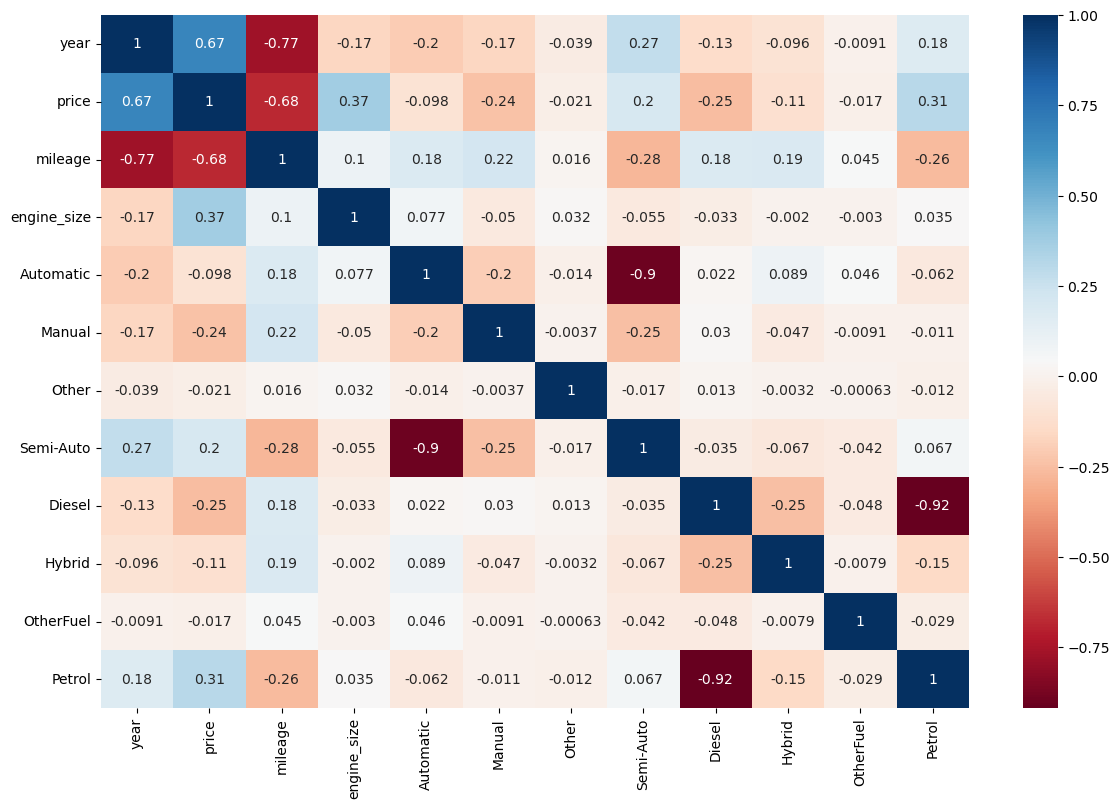

In [18]:
# Visualize them to make it clear to see
plt.figure(figsize=(14,9))
sns.heatmap(df.corr(), annot = True, cmap="RdBu")
plt.show()

### Insights from correlation
As we can see from above information:
1. Year:
- has moderate positive relationship with price (Cars produced in later year have higher price)
- has negative relationship with mileage (Cars produced in later year have lower mileage)

2. Price:
- has moderate negative relationship with mileage (Cars with higher mileage have lower price)

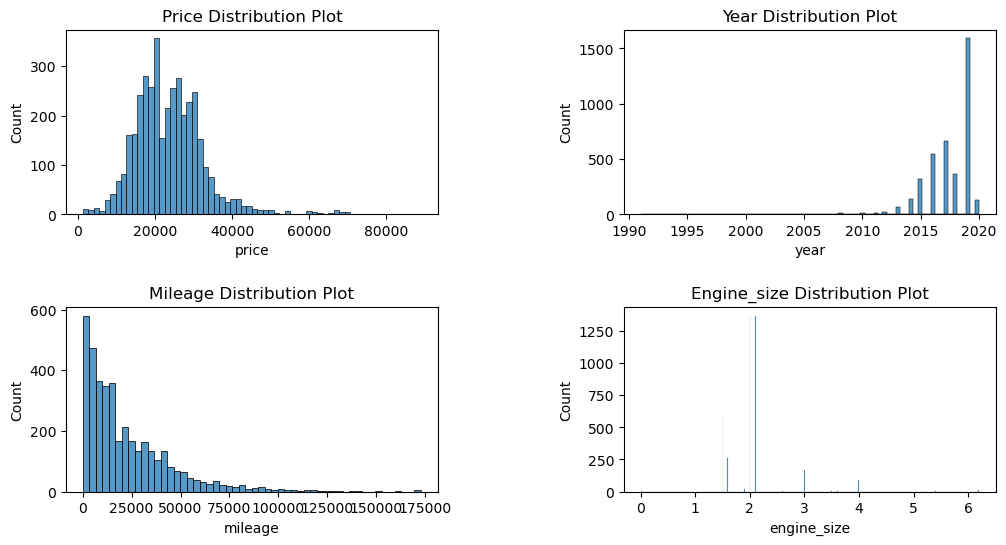

In [19]:
# Here we start on trying to visalize the data to see the relationship
plt.figure(figsize=(12,6))

# Ploting the Price Distribution plot
plt.subplot(2,2,1)
plt.title('Price Distribution Plot')
sns.histplot(df['price'])

# Ploting the Year Distribution plot
plt.subplot(2,2,2)
plt.title('Year Distribution Plot')
sns.histplot(df['year'])

# Ploting the Mileage Distribution plot
plt.subplot(2,2,3)
plt.title('Mileage Distribution Plot')
sns.histplot(df['mileage'])

# Ploting the Engine_size Distribution plot
plt.subplot(2,2,4)
plt.title('Engine_size Distribution Plot')
sns.histplot(df['engine_size'])

plt.subplots_adjust(wspace = 0.5, hspace=0.5)

plt.show()


### Graph plot information summary
- Mileage graph skewed toward left
- Year graph skewed toward right
- Price graph have a normal distribution with domain bewteen 0 - 50000
- Engine_size graph reveals that the majority of the engines have a size of approximately 2

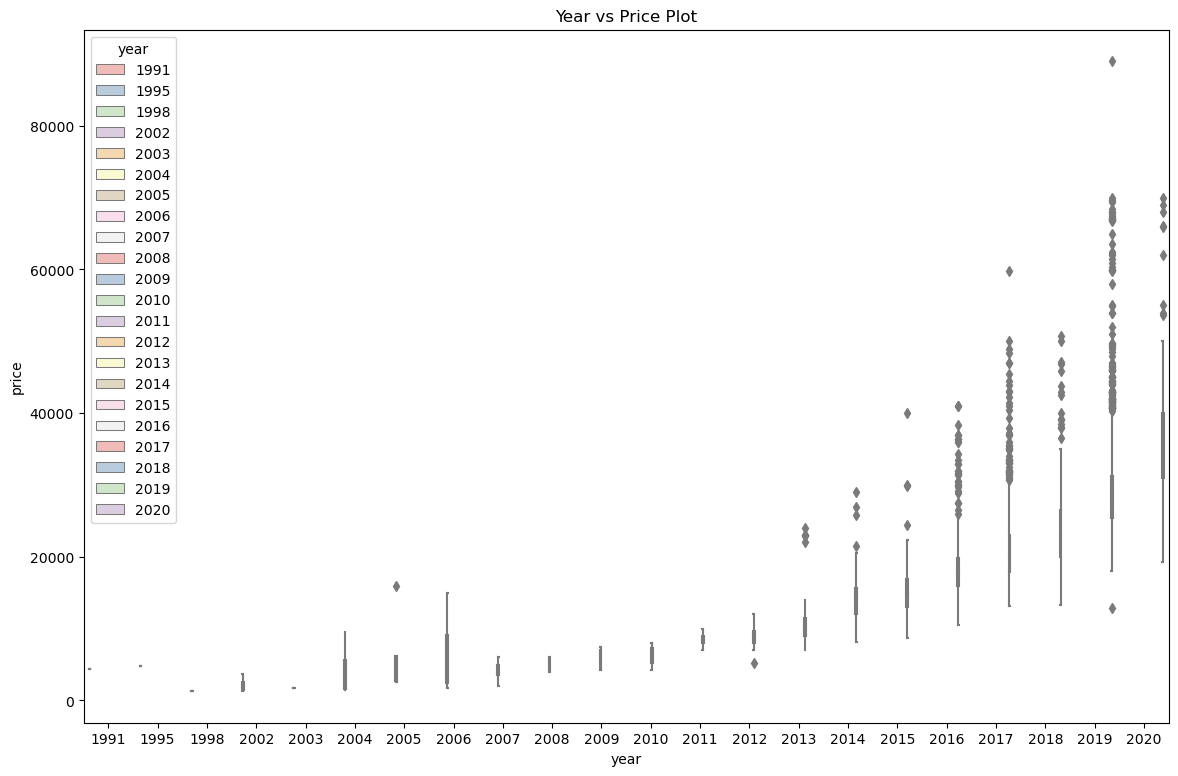

In [20]:
# Ploting the Price vs Year Distribution plot

plt.figure(figsize=(14,9))
plt.title('Year vs Price Plot')
#sns.boxplot(y=df['price'], x=df['year'], hue=df['year'], palette="Pastel1", legend=False)
sns.boxplot(y=df['price'], x=df['year'], hue=df['year'], palette="Pastel1")
plt.show()

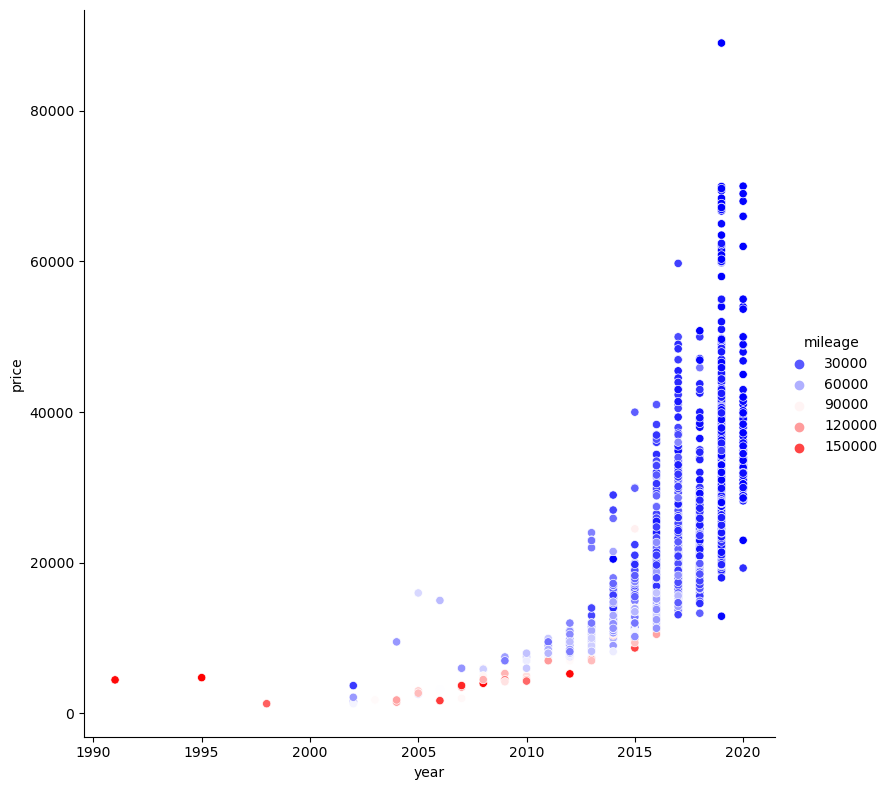

In [21]:
# Ploting the Price vs Mileage Distribution plot
sns.relplot(x=df['year'], y=df['price'], hue = df['mileage'], palette =('bwr'),height = 8)
plt.show()

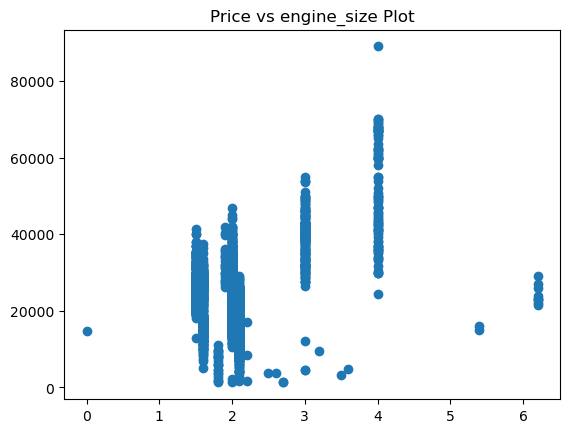

In [22]:
# Ploting the Price vs Engine_size Scatter plot

plt.scatter(df.engine_size, df.price)
plt.title("Price vs engine_size Plot")
plt.show()

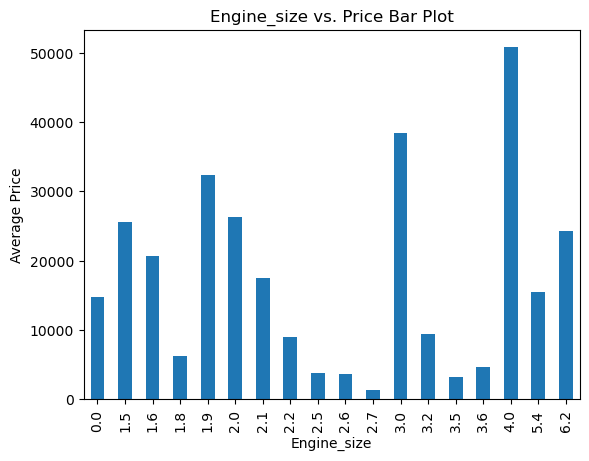

In [23]:
# Ploting the Average Price vs Engine_size Bar plot

average_price_groupy_by_engine_size = df.groupby('engine_size')['price'].mean()
average_price_groupy_by_engine_size.plot(kind='bar')
plt.xlabel('Engine_size')
plt.ylabel('Average Price')
plt.title('Engine_size vs. Price Bar Plot')
plt.show()

# 5. Feature Observation and Hypothesis

For the year, price, mileage, engine_size, they can be categorized as numerical data, while Automatic, Manual, Other, Semi-Auto, Diesel, Hybrid, OtherFuel	and Petrol can be defined as categorical data. 

In our Simple Linear Regression model, we are using three features from the dataset: 'year', 'mileage', and 'engine_size'. 

- 'year' is the year when the car was produced.
- 'mileage' is the kilometers/ miles the vehicle has covered in its life time.
- 'engine_size' refers to the volume of fuel and air that can be pushed through a car's cylinders. The larger the engine size, the more fuel and air can fit inside creating a bigger boom, giving larger engines higher power.

Intuitively, for each feature we could make the following hypotheses:

    - Cars produced in later year (higher 'year' value) will be worth more. Usually, cars of updated model and produced in later year will embed more functions and technologies, so it is reasonable that they cost more money. They are directly proportional variables.
    
    - Cars with higher mileage (higher 'mileage' value) will be worth less. If the number of mileages is higher, it is likely that the buyers might need to bear more maintenance cost after purchasing it, so the cars with higher mileage will have lower price. They are inversely proportional variables.
    
    - Cars with larger engine (higher 'engine_size' value) will be worth more. Typically, a bigger engine means more air and fuel, which in turn creates more power and gives a car more oomph. If a car has more power, it can run faster than others and it is likely that cars with larger engine size are worth more. They are directly proportional variables.
    
    

For Part 8 (Polynomial Regression Model), we followed the same logic, only 'year', 'mileage' and 'engine_size' were choosen as the features for polynomial regression model. Then, we will compare the performance over the simple linear regression model and polynomial regression model.


# 6. A Simple Linear Regression Model

Our Simple Linear Regression Model will use three features, including 'year', 'mileage', and 'engine_size'.

From the above EDA, we can acquire the following insights that illustrate how car price is affected:
1. Year has has moderate positive relationship with price (shown as 0.674218 in correlation result).
2. Mileage has moderate negative relationship with price (shown as -0.679101 in correlation result).
3. Althogh the trends between engine_size and price fluctuate in scatter plot and bar plot (comparing average price and engine_size), the correlation value from engine_size is still the third highest value (shown as 0.373003 in correlation result) that worth our further evaluation. 



In [24]:
# divide the dataframe into features and response
response = df['price']
features = df[['year','mileage','engine_size']]

features.head()

,year,mileage,engine_size
0,2020,1200.0,2.0
1,2020,1000.0,1.5
2,2020,500.0,2.0
3,2019,5000.0,2.0
4,2019,4500.0,2.0


In [25]:
# split the dataset into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(features, response, test_size=0.1, random_state=42)
print("Training and Testing split was successful")

Training and Testing split was successful


In [26]:
# build the Linear Regression model and feed the traning dataset into the model built
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [27]:
# Obtain the predictions for the test dataset
predictions = model.predict(X_test)

In [28]:
# Calculate R^2 metrics
r2_train = model.score(X_train, Y_train)
print("R^2 in Training Set:", r2_train)

r2_test = model.score(X_test, Y_test)
print("R^2 in Testing Set:", r2_test)


R^2 in Training Set: 0.7520365500975299
R^2 in Testing Set: 0.7217476316543225


In [29]:
# Calculate RMSE metrics
mse = mean_squared_error(Y_test, predictions)

print("RMSE is: ", mse**0.5)


RMSE is:  5350.030455274335


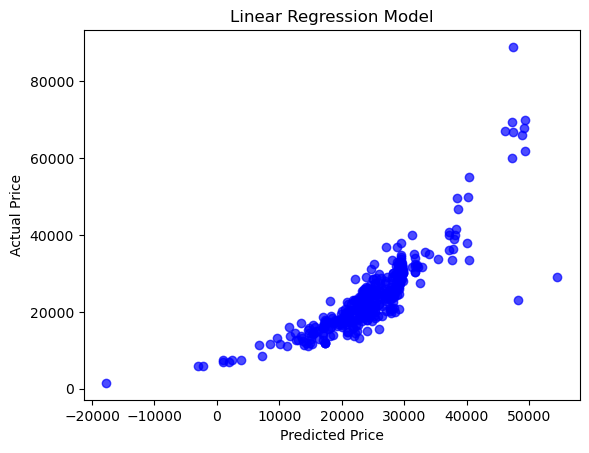

In [30]:
# Plot the prediction vs actual values
actual_values = Y_test
plt.scatter(predictions, actual_values, alpha=0.7, color='b')
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title('Linear Regression Model')
plt.show()

In [31]:
# Print the coefficient list
feature_list = list(X_train.columns)
coef = model.coef_.transpose()
coef_table = np.vstack((feature_list, coef)).T
df_coefficient_list = pd.DataFrame (coef_table, columns = ['Feature', 'Coefficients'])
df_coefficient_list

,Feature,Coefficients
0,year,1930.4444792255565
1,mileage,-0.14082026662650807
2,engine_size,8830.3584539967


# 7. Linear Regression Model with Lasso/Ridge

## Supplementary information
1. Ridge Model will be used
2. All available features will be used (price cloumn as target variable & all other 11 columns as features) 
3. Standard Scaler will be applied

In [32]:
# Divide the dataframe into features and response
y_ridge = df.price
x_ridge = df.drop('price', axis = 1)


In [33]:
# scale the features
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

# calucate mean & STD and transform all value to standard value
zscore = ss.fit_transform(x_ridge)

feature_ss = pd.DataFrame(zscore, index = x_ridge.index, columns = x_ridge.columns)

feature_ss = feature_ss.reset_index(drop = True)

feature_ss.head()


,year,mileage,engine_size,Automatic,Manual,Other,Semi-Auto,Diesel,Hybrid,OtherFuel,Petrol
0,1.205805,-0.937427,-0.075353,1.181448,-0.231945,-0.016019,-1.064684,0.816409,-0.200746,-0.039264,-0.749466
1,1.205805,-0.946281,-1.100221,1.181448,-0.231945,-0.016019,-1.064684,-1.224876,-0.200746,-0.039264,1.334284
2,1.205805,-0.968419,-0.075353,1.181448,-0.231945,-0.016019,-1.064684,0.816409,-0.200746,-0.039264,-0.749466
3,0.752203,-0.769184,-0.075353,1.181448,-0.231945,-0.016019,-1.064684,0.816409,-0.200746,-0.039264,-0.749466
4,0.752203,-0.791321,-0.075353,1.181448,-0.231945,-0.016019,-1.064684,0.816409,-0.200746,-0.039264,-0.749466


In [34]:
# Split the dataset into training and testing sets
X_train_ss, X_test_ss, Y_train_ss, Y_test_ss = train_test_split(feature_ss, response, test_size=0.1, random_state = 42)


In [35]:
# Generate an array of alpha values
alphas = 10 ** np.linspace(30, -30, 20)

alphas

array([1.00000000e+30, 6.95192796e+26, 4.83293024e+23, 3.35981829e+20,
       2.33572147e+17, 1.62377674e+14, 1.12883789e+11, 7.84759970e+07,
       5.45559478e+04, 3.79269019e+01, 2.63665090e-02, 1.83298071e-05,
       1.27427499e-08, 8.85866790e-12, 6.15848211e-15, 4.28133240e-18,
       2.97635144e-21, 2.06913808e-24, 1.43844989e-27, 1.00000000e-30])

In [36]:
# Locate the best Alpha value
rmse_test_list = []
r2_test_list = []
r2_train_list = []

best_r2_test = 0
best_alpha = 0
counter = 0
best_counter = 0


for a in alphas:
    ridge = Ridge(alpha = a, max_iter = 1000)
    ridge.fit(X_train_ss, Y_train_ss)
    prediction = ridge.predict(X_test_ss)

    r2_train = ridge.score(X_train_ss, Y_train_ss)
    r2_train_list.append(r2_train)

    r2_test = ridge.score(X_test_ss, Y_test_ss)
    r2_test_list.append(r2_test)

    rmse_test = mean_squared_error(Y_test_ss, prediction) **0.5
    #rmse_test = np.sqrt(mean_squared_error(Y_test_ss, prediction))
    rmse_test_list.append(rmse_test)

    if r2_test > best_r2_test:
        best_r2_test = r2_test
        best_alpha = a
        best_counter = counter
        
    counter = counter +1

ridge_result = np.vstack((alphas, r2_train_list, r2_test_list, rmse_test_list)).T

ridge_df = pd.DataFrame(ridge_result, columns = ['Alpha', 'R2 Train', 'R2 Test', 'RMSE'])

print(ridge_df)
print()
print("best_alpha: ",best_alpha)
print()
print("Position:", best_counter)


           Alpha      R2 Train   R2 Test          RMSE
0   1.000000e+30  0.000000e+00 -0.001793  10151.396081
1   6.951928e+26  0.000000e+00 -0.001793  10151.396081
2   4.832930e+23  0.000000e+00 -0.001793  10151.396081
3   3.359818e+20  0.000000e+00 -0.001793  10151.396081
4   2.335721e+17  4.063416e-14 -0.001793  10151.396081
5   1.623777e+14  5.861134e-11 -0.001793  10151.396081
6   1.128838e+11  8.430943e-08 -0.001793  10151.395732
7   7.847600e+07  1.212576e-04 -0.001694  10150.893963
8   5.455595e+04  1.446437e-01  0.118196   9524.076935
9   3.792690e+01  7.708499e-01  0.735359   5217.532418
10  2.636651e-02  7.709184e-01  0.736451   5206.760199
11  1.832981e-05  7.709184e-01  0.736452   5206.753038
12  1.274275e-08  7.709184e-01  0.736452   5206.753033
13  8.858668e-12  7.709184e-01  0.736452   5206.753033
14  6.158482e-15  7.709184e-01  0.736452   5206.753033
15  4.281332e-18  7.709184e-01  0.736452   5206.753033
16  2.976351e-21  7.709184e-01  0.736452   5206.753013
17  2.0691

In [37]:
# Find out the R^2 metrics and RMSE using the best Alpha value

ridge = Ridge(alpha = best_alpha)

ridge.fit(X_train_ss, Y_train_ss)
prediction = ridge.predict(X_test_ss)

print('R^2 train:', ridge.score(X_train_ss, Y_train_ss))
print('R^2 test:', ridge.score(X_test_ss, Y_test_ss))
print('RMSE test:', mean_squared_error(prediction, Y_test_ss) **0.5)
print()


R^2 train: 0.770714322528803
R^2 test: 0.7378754647561725
RMSE test: 5192.66919489133



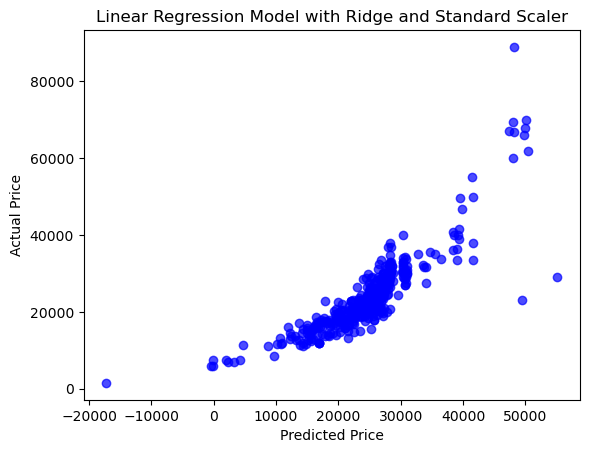

In [38]:
# Plot the prediction vs actual values
actual_value = Y_test_ss
plt.scatter(prediction, actual_value, alpha=0.7, color='b')
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title('Linear Regression Model with Ridge and Standard Scaler')
plt.show()

In [39]:
feat = list(X_train_ss.columns)
coef_ss = ridge.coef_.transpose()

coef_table = np.vstack((feat, coef_ss)).T
df = pd.DataFrame(coef_table, columns=['Feature', 'Coef.(SS)'])
df

,Feature,Coef.(SS)
0,year,4300.302158830424
1,mileage,-2751.777356611256
2,engine_size,4211.2764971453
3,Automatic,-3.90699198266365e+16
4,Manual,-1.7438490147763908e+16
5,Other,-1268835670440032.8
6,Semi-Auto,-3.953661645007858e+16
7,Diesel,7.936526619469784e+16
8,Hybrid,3.1262422558341576e+16
9,OtherFuel,6351178952744710.0


# 8. (A) Polynomial Regression Model (without Lasso/Ridge)

In [40]:
# import library for polynomial regression
from sklearn.preprocessing import PolynomialFeatures

In [41]:
# Here to load data in the cleaned dataset for processing
df = pd.read_csv("cleaned_data.csv")

# check
df

,year,price,mileage,engine_size,Automatic,Manual,Other,Semi-Auto,Diesel,Hybrid,OtherFuel,Petrol
0,2020,30495,1200.0,2.0,1,0,0,0,1,0,0,0
1,2020,29989,1000.0,1.5,1,0,0,0,0,0,0,1
2,2020,37899,500.0,2.0,1,0,0,0,1,0,0,0
3,2019,30399,5000.0,2.0,1,0,0,0,1,0,0,0
4,2019,29899,4500.0,2.0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3893,2017,14700,31357.0,1.6,0,1,0,0,1,0,0,0
3894,2018,18500,28248.0,2.1,1,0,0,0,1,0,0,0
3895,2014,11900,48055.0,2.1,0,1,0,0,1,0,0,0
3896,2014,11300,49865.0,2.1,1,0,0,0,1,0,0,0


In [42]:
# Divide the dataframe into features and response

#response
y = df.price

#features
x = df.drop('price', axis = 1)
x = df[['year','mileage','engine_size']]
x.head()

,year,mileage,engine_size
0,2020,1200.0,2.0
1,2020,1000.0,1.5
2,2020,500.0,2.0
3,2019,5000.0,2.0
4,2019,4500.0,2.0


In [43]:
# scale the features
ss = StandardScaler()

# calucate mean & STD and transform all value to standard value
zscore_poly = ss.fit_transform(x)
feature_poly_ss = pd.DataFrame(zscore_poly, index = x.index, columns = x.columns)
feature_poly_ss = feature_poly_ss.reset_index(drop = True)
feature_poly_ss.head()

,year,mileage,engine_size
0,1.205805,-0.937427,-0.075353
1,1.205805,-0.946281,-1.100221
2,1.205805,-0.968419,-0.075353
3,0.752203,-0.769184,-0.075353
4,0.752203,-0.791321,-0.075353


In [44]:
# split the dataset into training and testing sets
X_train_poly_ss, X_test_poly_ss, Y_train_poly_ss, Y_test_poly_ss = train_test_split(feature_poly_ss, y, test_size = 0.1, random_state = 42)

In [45]:
# declare variables to store the results
r2_train_poly_result_list = []
r2_test_poly_result_list = []
rmse_poly_result_list = []
degree_poly_list = []

In [46]:
# define a function to apply polynomial regression model
def applyPolynomialRegression(input_degree):
    
    degree_poly_list.append(input_degree)
    
    # create polynomial features
    poly = PolynomialFeatures(degree = input_degree)
    X_train_poly_fitted = poly.fit_transform(X_train_poly_ss)


    # fit a polynomial regression model
    lin_reg_model = LinearRegression()
    lin_reg_model.fit(X_train_poly_fitted, Y_train_poly_ss)


    # make predictions
    X_test_poly_transformed = poly.transform(X_test_poly_ss)
    y_pred =lin_reg_model.predict(X_test_poly_transformed)


    # show the result
    # calculate R^2 metrics
    r2_train_poly = lin_reg_model.score(X_train_poly_fitted, Y_train_poly_ss)
    r2_train_poly_result_list.append(r2_train_poly)
    print("R^2 in Training Set: ", r2_train_poly)

    r2_test_poly = lin_reg_model.score(X_test_poly_transformed, Y_test_poly_ss)
    r2_test_poly_result_list.append(r2_test_poly)
    print("R^2 in Testing Set: ", r2_test_poly)

    rmse_poly = np.sqrt(mean_squared_error(Y_test_poly_ss, y_pred))
    rmse_poly_result_list.append(rmse_poly)
    print("RMSE is: ", rmse_poly)

    # Get the coefficients from the polynomial regression model
    print("Number of features used in the model: ", len(lin_reg_model.coef_))
    # Plot the prediction vs actual values
    %matplotlib inline
    actual_value = Y_test_poly_ss
    plt.scatter(y_pred, actual_value, alpha=0.7, color='b')
    plt.xlabel("Predicted Price")
    plt.ylabel("Actual Price")
    plt.title("Polynomial Regression Model (Degree = " + str(input_degree) + ")")
    plt.show()

    
    print("------------------------------------------------------------------------------------")


R^2 in Training Set:  0.8509203921478572
R^2 in Testing Set:  0.8431354076652952
RMSE is:  4016.976417238915
Number of features used in the model:  10


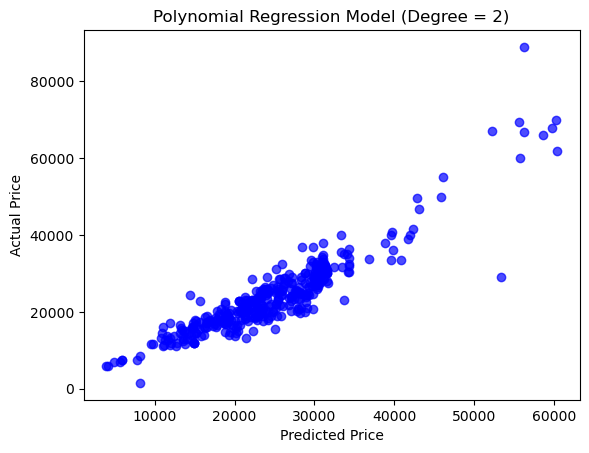

------------------------------------------------------------------------------------
R^2 in Training Set:  0.8860932596868539
R^2 in Testing Set:  0.8936597574313636
RMSE is:  3307.3917809739046
Number of features used in the model:  20


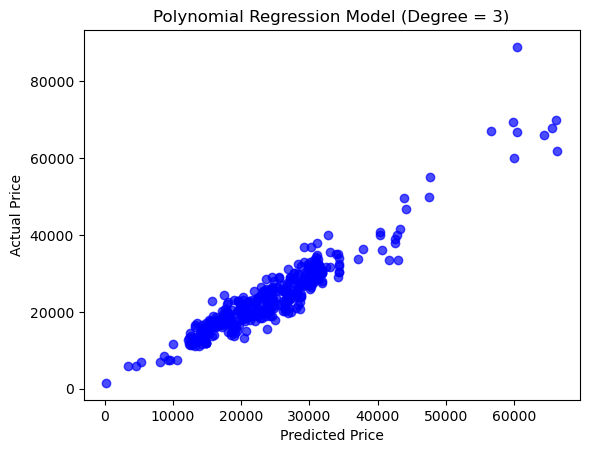

------------------------------------------------------------------------------------
R^2 in Training Set:  0.8938058924139547
R^2 in Testing Set:  0.901465685423267
RMSE is:  3183.6885056088977
Number of features used in the model:  35


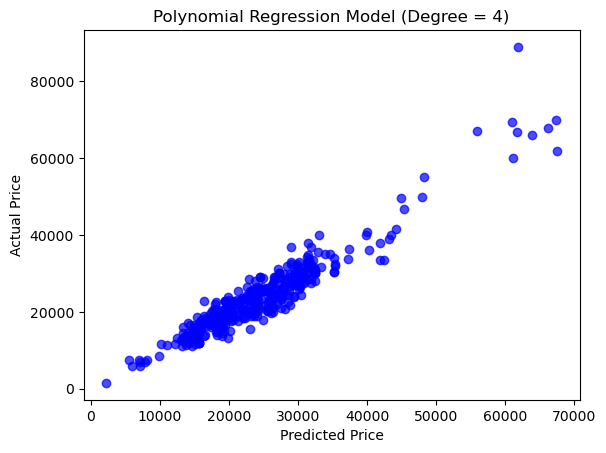

------------------------------------------------------------------------------------
R^2 in Training Set:  0.8971276826617463
R^2 in Testing Set:  0.902645120662435
RMSE is:  3164.577099127719
Number of features used in the model:  56


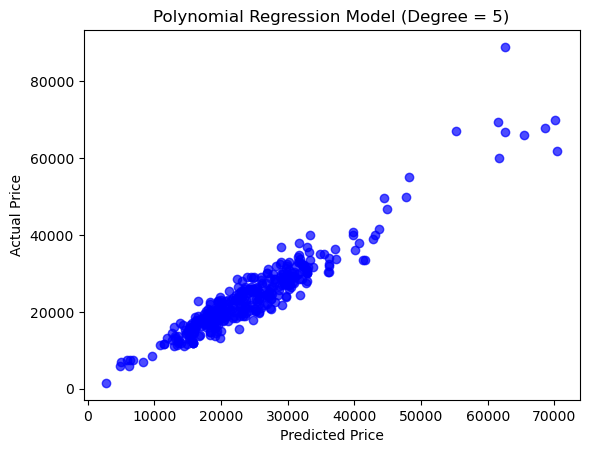

------------------------------------------------------------------------------------
R^2 in Training Set:  0.8998049395170751
R^2 in Testing Set:  0.5131653050251215
RMSE is:  7076.647776364949
Number of features used in the model:  84


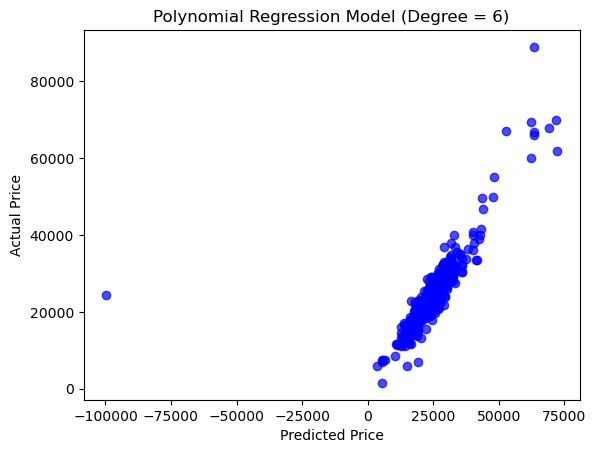

------------------------------------------------------------------------------------


In [47]:
#clear the result list first
r2_train_poly_result_list.clear()
r2_test_poly_result_list.clear()
rmse_poly_result_list.clear()
degree_poly_list.clear()

# call the function above to apply polynomial regression
for i in range(2, 7):
    applyPolynomialRegression(i)

In [48]:
# list the results for comparison
poly_result_list = np.vstack((degree_poly_list, r2_train_poly_result_list, r2_test_poly_result_list, rmse_poly_result_list)).T

poly_result_df = pd.DataFrame(poly_result_list, columns = ['Degree', 'R2 Train', 'R2 Test', 'RMSE Test'])
print(poly_result_df)
print()

   Degree  R2 Train   R2 Test    RMSE Test
0     2.0  0.850920  0.843135  4016.976417
1     3.0  0.886093  0.893660  3307.391781
2     4.0  0.893806  0.901466  3183.688506
3     5.0  0.897128  0.902645  3164.577099
4     6.0  0.899805  0.513165  7076.647776



### Observation

1. Polynomial Regression outperforms Simple Linear Regression: In the case of simple linear regression, the testing set shows an R-squared (R2) of 0.7217 and a root mean squared error (RMSE) of 5350. However, polynomial regression (Degree = 2 to 5) produces even better results for the same data set (see the result table above).

2. Increasing the polynomial degree improves the model’s performance up to a certain point (degree 5 in the case), as indicated by higher R2 and lower RMSE.

3. Degree 6 leads to overfitting, where the model fits the training data too closely but performs poorly on new, unseen data.

4. Although Degree 4 and 5 produce better results over Degree 2 and 3, they may also bear the risk of overfitting. Further validation should be conducted.

# 8. (B) Polynomial Regression Model with Ridge Regularization

In [49]:
r2_train_poly_ridge_result_list = []
r2_test_poly_ridge_result_list = []
rmse_poly_ridge_result_list = []
degree_poly_ridge_list = []

import warnings
# Filter out the specific warning
warnings.filterwarnings("ignore", message="Singular matrix in solving dual problem. Using least-squares solution instead.", category=UserWarning)

# Filter out the specific LinAlgWarning
warnings.filterwarnings("ignore", message="Ill-conditioned matrix.*")

In [50]:
# define a function to apply polynomial regression model with Ridge Regularization
def applyPolynomialRegression_Ridge(input_degree):
    r2_train_poly_ridge_list = []
    r2_test_poly_ridge_list = []
    rmse_poly_ridge_list = []
    
    best_r2_test_poly_ridge = 0
    best_alpha_poly_ridge = 0
    counter_poly_ridge = 0
    best_counter_poly_ridge = 0
    
    degree_poly_ridge_list.append(input_degree)
    
    # Generate an array of alpha values
    alphas = 10 ** np.linspace(40, -40, 20)   
    
    # create polynomial features
    poly = PolynomialFeatures(degree = input_degree)
    X_train_poly_fitted = poly.fit_transform(X_train_poly_ss)

    # Fit a polynomial regression model with Ridge regularization
    for alpha in alphas:
        ridge_model = Ridge(alpha = alpha, max_iter = 1000)
        ridge_model.fit(X_train_poly_fitted, Y_train_poly_ss)

        # Make predictions
        X_test_poly_transformed = poly.transform(X_test_poly_ss)
        y_pred_poly_ridge = ridge_model.predict(X_test_poly_transformed)
        
        # calculate the metrics
        r2_train_poly_ridge = ridge_model.score(X_train_poly_fitted, Y_train_poly_ss)
        r2_train_poly_ridge_list.append(r2_train_poly_ridge)
        
        r2_test_poly_ridge = ridge_model.score(X_test_poly_transformed, Y_test_poly_ss)
        r2_test_poly_ridge_list.append(r2_test_poly_ridge)
        
        rmse_poly_ridge = np.sqrt(mean_squared_error(Y_test_poly_ss, y_pred_poly_ridge))
        rmse_poly_ridge_list.append(rmse_poly_ridge)
        
        if r2_test_poly_ridge > best_r2_test_poly_ridge:
            best_r2_test_poly_ridge = r2_test_poly_ridge
            best_alpha_poly_ridge = alpha
            best_counter_poly_ridge = counter_poly_ridge
        
        counter_poly_ridge = counter_poly_ridge + 1

    # show the result
    poly_ridge_result = np.vstack((alphas, r2_train_poly_ridge_list, r2_test_poly_ridge_list, rmse_poly_ridge_list)).T
    poly_ridge_df = pd.DataFrame(poly_ridge_result, columns = ['Alpha', 'R2 Train', 'R2 Test', 'RMSE Test'])
    print("Polynomial Regression (Degree = " + str(input_degree) + ") with Ridge Regularization:")
    print()
    print(poly_ridge_df)
    print()
    print("best_alpha: ", best_alpha_poly_ridge)    
    print("Position:", best_counter_poly_ridge)
    print()
    
#--------------------------------------------------------------------------
# use the best alpha value to apply polynoimal regress with ridge
    # apply the model
    ridge_model = Ridge(alpha = best_alpha_poly_ridge)
    ridge_model.fit(X_train_poly_fitted, Y_train_poly_ss)
    y_pred_poly_ridge = ridge_model.predict(X_test_poly_transformed)
        
    # calculate the result metric
    r2_train_poly_ridge = ridge_model.score(X_train_poly_fitted, Y_train_poly_ss)
    r2_test_poly_ridge = ridge_model.score(X_test_poly_transformed, Y_test_poly_ss)
    rmse_poly_ridge = np.sqrt(mean_squared_error(Y_test_poly_ss, y_pred_poly_ridge))
    r2_train_poly_ridge_result_list.append(r2_train_poly_ridge)
    r2_test_poly_ridge_result_list.append(r2_test_poly_ridge)
    rmse_poly_ridge_result_list.append(rmse_poly_ridge)
    
    print('Applied the best alpha value to the model:')
    print('R^2 train:', r2_train_poly_ridge)
    print('R^2 test:', r2_test_poly_ridge)
    print('RMSE test:', rmse_poly_ridge)
     # Plot the prediction vs actual values
    %matplotlib inline
    actual_value = Y_test_poly_ss
    plt.scatter(y_pred_poly_ridge, actual_value, alpha=0.7, color='b')
    plt.xlabel("Predicted Price")
    plt.ylabel("Actual Price")
    plt.title("Polynomial Regression Model (Degree = " + str(input_degree) + ") with Ridge Regularization")
    plt.show()

    print("------------------------------------------------------------------------------------")
    
    

Polynomial Regression (Degree = 2) with Ridge Regularization:

           Alpha      R2 Train   R2 Test     RMSE Test
0   1.000000e+40  0.000000e+00 -0.001793  10151.396081
1   6.158482e+35  0.000000e+00 -0.001793  10151.396081
2   3.792690e+31  0.000000e+00 -0.001793  10151.396081
3   2.335721e+27  0.000000e+00 -0.001793  10151.396081
4   1.438450e+23  0.000000e+00 -0.001793  10151.396081
5   8.858668e+18  3.996803e-15 -0.001793  10151.396081
6   5.455595e+14  6.609557e-11 -0.001793  10151.396081
7   3.359818e+10  1.073243e-06 -0.001792  10151.391278
8   2.069138e+06  1.657491e-02  0.012956  10076.393535
9   1.274275e+02  8.493571e-01  0.838356   4077.709347
10  7.847600e-03  8.509204e-01  0.843135   4016.979429
11  4.832930e-07  8.509204e-01  0.843135   4016.976417
12  2.976351e-11  8.509204e-01  0.843135   4016.976417
13  1.832981e-15  8.509204e-01  0.843135   4016.976417
14  1.128838e-19  8.509204e-01  0.843135   4016.976417
15  6.951928e-24  8.509204e-01  0.843135   4016.976417
16

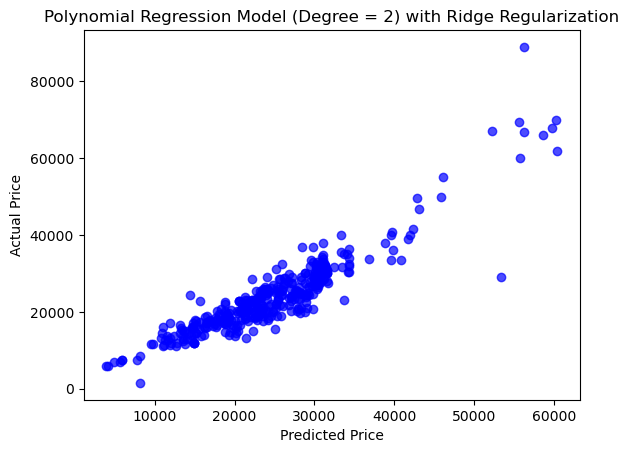

------------------------------------------------------------------------------------
Polynomial Regression (Degree = 3) with Ridge Regularization:

           Alpha      R2 Train   R2 Test     RMSE Test
0   1.000000e+40  0.000000e+00 -0.001793  10151.396081
1   6.158482e+35  0.000000e+00 -0.001793  10151.396081
2   3.792690e+31  0.000000e+00 -0.001793  10151.396081
3   2.335721e+27  0.000000e+00 -0.001793  10151.396081
4   1.438450e+23  0.000000e+00 -0.001793  10151.396081
5   8.858668e+18  8.515411e-14 -0.001793  10151.396081
6   5.455595e+14  1.384159e-09 -0.001793  10151.396076
7   3.359818e+10  2.246944e-05 -0.001776  10151.313056
8   2.069138e+06  8.583034e-02  0.083707   9708.543892
9   1.274275e+02  8.838137e-01  0.894256   3298.114297
10  7.847600e-03  8.860933e-01  0.893660   3307.387587
11  4.832930e-07  8.860933e-01  0.893660   3307.391781
12  2.976351e-11  8.860933e-01  0.893660   3307.391781
13  1.832981e-15  8.860933e-01  0.893660   3307.391781
14  1.128838e-19  8.860933e

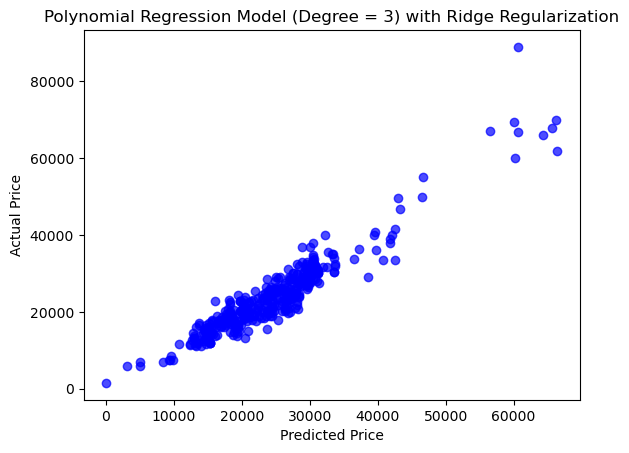

------------------------------------------------------------------------------------
Polynomial Regression (Degree = 4) with Ridge Regularization:

           Alpha      R2 Train   R2 Test     RMSE Test
0   1.000000e+40  0.000000e+00 -0.001793  10151.396081
1   6.158482e+35  0.000000e+00 -0.001793  10151.396081
2   3.792690e+31  0.000000e+00 -0.001793  10151.396081
3   2.335721e+27  0.000000e+00 -0.001793  10151.396081
4   1.438450e+23  0.000000e+00 -0.001793  10151.396081
5   8.858668e+18  2.714384e-12 -0.001793  10151.396081
6   5.455595e+14  4.407670e-08 -0.001793  10151.395980
7   3.359818e+10  6.911743e-04 -0.001473  10149.776026
8   2.069138e+06  1.772604e-01  0.218184   8967.866293
9   1.274275e+02  8.906888e-01  0.904443   3135.218746
10  7.847600e-03  8.938059e-01  0.901467   3183.665178
11  4.832930e-07  8.938059e-01  0.901466   3183.688504
12  2.976351e-11  8.938059e-01  0.901466   3183.688506
13  1.832981e-15  8.938059e-01  0.901466   3183.688506
14  1.128838e-19  8.938059e

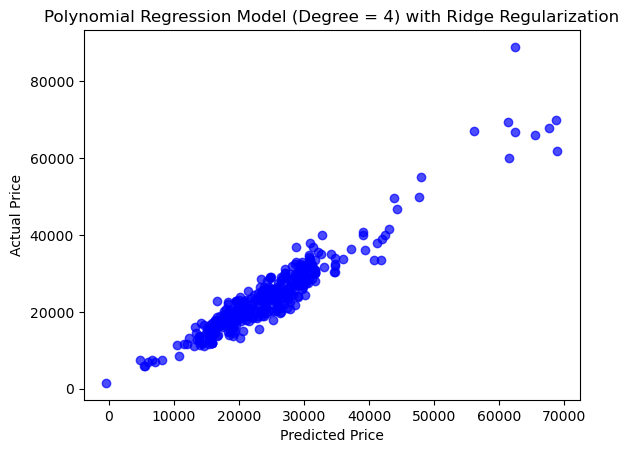

------------------------------------------------------------------------------------
Polynomial Regression (Degree = 5) with Ridge Regularization:

           Alpha      R2 Train   R2 Test     RMSE Test
0   1.000000e+40  0.000000e+00 -0.001793  10151.396081
1   6.158482e+35  0.000000e+00 -0.001793  10151.396081
2   3.792690e+31  0.000000e+00 -0.001793  10151.396081
3   2.335721e+27  0.000000e+00 -0.001793  10151.396081
4   1.438450e+23  1.021405e-14 -0.001793  10151.396081
5   8.858668e+18  1.665350e-10 -0.001793  10151.396081
6   5.455595e+14  2.703342e-06 -0.001792  10151.392782
7   3.359818e+10  7.491224e-03  0.001851  10132.915884
8   2.069138e+06  3.176529e-01  0.410563   7786.734539
9   1.274275e+02  8.932451e-01  0.896792   3258.320456
10  7.847600e-03  8.971277e-01  0.902645   3164.583276
11  4.832930e-07  8.971277e-01  0.902645   3164.577099
12  2.976351e-11  8.971277e-01  0.902645   3164.577098
13  1.832981e-15  8.971277e-01  0.902645   3164.577098
14  1.128838e-19  8.971277e

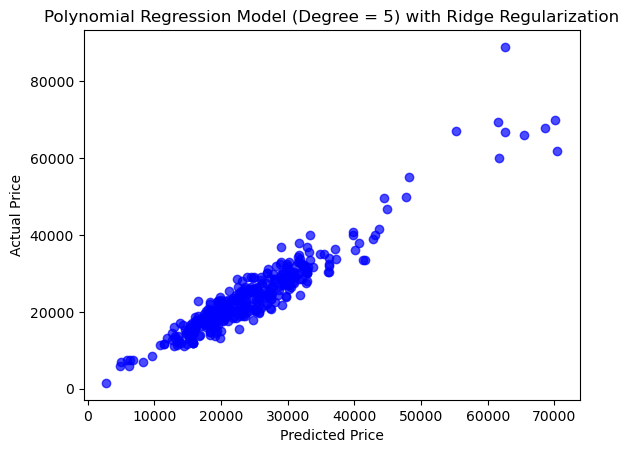

------------------------------------------------------------------------------------
Polynomial Regression (Degree = 6) with Ridge Regularization:

           Alpha      R2 Train   R2 Test     RMSE Test
0   1.000000e+40  0.000000e+00 -0.001793  10151.396081
1   6.158482e+35  0.000000e+00 -0.001793  10151.396081
2   3.792690e+31  0.000000e+00 -0.001793  10151.396081
3   2.335721e+27  0.000000e+00 -0.001793  10151.396081
4   1.438450e+23  8.829604e-13 -0.001793  10151.396081
5   8.858668e+18  1.433653e-08 -0.001793  10151.396072
6   5.455595e+14  2.235955e-04 -0.001764  10151.249441
7   3.359818e+10  2.229397e-02  0.011421  10084.226821
8   2.069138e+06  3.646869e-01  0.531393   6942.902659
9   1.274275e+02  8.956471e-01  0.874421   3594.146705
10  7.847600e-03  8.998049e-01  0.514964   7063.565692
11  4.832930e-07  8.998049e-01  0.513165   7076.652037
12  2.976351e-11  8.998049e-01  0.513165   7076.652555
13  1.832981e-15  8.998049e-01  0.513165   7076.652921
14  1.128838e-19  8.998049e

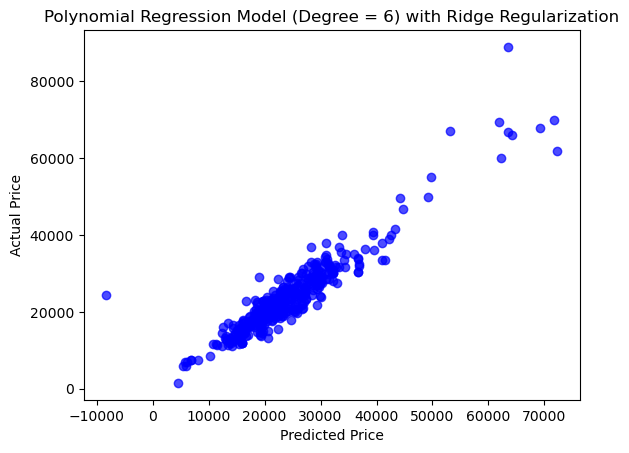

------------------------------------------------------------------------------------


In [51]:
#clear the result list first
r2_train_poly_ridge_result_list.clear()
r2_test_poly_ridge_result_list.clear()
rmse_poly_ridge_result_list.clear()
degree_poly_ridge_list.clear()

# call the function above to apply polynomial regression
for i in range(2, 7):
    applyPolynomialRegression_Ridge(i)


In [52]:
print("Applied Polynomial Regression (without Ridge Regularization):")
print(poly_result_df)
print()

print("Applied Polynomial Regression (with Ridge Regularization):")
poly_ridge_result_list = np.vstack((degree_poly_ridge_list, r2_train_poly_ridge_result_list, r2_test_poly_ridge_result_list, rmse_poly_ridge_result_list)).T
poly_result_ridge_df = pd.DataFrame(poly_ridge_result_list, columns = ['Degree', 'R2 Train', 'R2 Test', 'RMSE Test'])
print(poly_result_ridge_df)
print()

Applied Polynomial Regression (without Ridge Regularization):
   Degree  R2 Train   R2 Test    RMSE Test
0     2.0  0.850920  0.843135  4016.976417
1     3.0  0.886093  0.893660  3307.391781
2     4.0  0.893806  0.901466  3183.688506
3     5.0  0.897128  0.902645  3164.577099
4     6.0  0.899805  0.513165  7076.647776

Applied Polynomial Regression (with Ridge Regularization):
   Degree  R2 Train   R2 Test    RMSE Test
0     2.0  0.850920  0.843135  4016.976417
1     3.0  0.883814  0.894256  3298.114297
2     4.0  0.890689  0.904443  3135.218746
3     5.0  0.897128  0.902645  3164.577098
4     6.0  0.895647  0.874421  3594.146705



## Observation:
1. Polynomial regression with Ridge regularization generally provides better generalization and reduces overfitting compared to non-regularized polynomial regression, escpically for Degree 6.

2. In this case, Degree 4 offeres the best performance. However it may leads to overfitting. The choice of the best model (degree) depends on the balance between complexity and generalization we aim to achieve, and it may require further cross-validation to make a final decision. In this case, Degree 3 offers slightly reduced performance (R2 and RMSE) but better generalization, making it a potentially better choice than Degree 4 in this context.

# Part B Competition

In [53]:
#To import the competition_data 
dcomp = pd.read_csv('competition_data.csv')

# have a look
dcomp.head()

,Unnamed: 0,year,price,mileage,engine_size,Automatic,Manual,Other,Semi-Auto,fuel_type_Diesel,fuel_type_Hybrid,fuel_type_Other,fuel_type_Petrol
0,0,2020.0,30495,1200.0,2.0,1,0,0,0,1,0,0,0
1,1,2020.0,29989,1000.0,1.5,1,0,0,0,0,0,0,1
2,2,2020.0,37899,500.0,2.0,1,0,0,0,1,0,0,0
3,3,2019.0,30399,5000.0,2.0,1,0,0,0,1,0,0,0
4,4,2019.0,29899,4500.0,2.0,1,0,0,0,1,0,0,0


In [54]:
# drop the first column since it is only an index
dcomp = dcomp.drop(dcomp.columns[0], axis=1)

# change the data type of year to integer
dcomp['year'] = dcomp['year'].astype('int64')

# check
dcomp.head()

,year,price,mileage,engine_size,Automatic,Manual,Other,Semi-Auto,fuel_type_Diesel,fuel_type_Hybrid,fuel_type_Other,fuel_type_Petrol
0,2020,30495,1200.0,2.0,1,0,0,0,1,0,0,0
1,2020,29989,1000.0,1.5,1,0,0,0,0,0,0,1
2,2020,37899,500.0,2.0,1,0,0,0,1,0,0,0
3,2019,30399,5000.0,2.0,1,0,0,0,1,0,0,0
4,2019,29899,4500.0,2.0,1,0,0,0,1,0,0,0


In [55]:
## Checking the basic statistics of the competition dataset
dcomp.describe()

,year,price,mileage,engine_size,Automatic,Manual,Other,Semi-Auto,fuel_type_Diesel,fuel_type_Hybrid,fuel_type_Other,fuel_type_Petrol
count,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000,3897.000000
mean,2017.341288,23662.959969,22378.806518,246.505733,0.417501,0.051065,0.000257,0.531178,0.600205,0.038748,0.001540,0.359507
std,2.204979,8894.733784,22589.428526,703.211619,0.493210,0.220158,0.016019,0.499091,0.489919,0.193018,0.039213,0.479918
min,1991.000000,1290.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,17690.000000,6000.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018.000000,22980.000000,14640.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2019.000000,28900.000000,32442.000000,2.100000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,2020.000000,69995.000000,173000.000000,6208.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
# Checking out the correlation of the dataset
dcomp.corr()

,year,price,mileage,engine_size,Automatic,Manual,Other,Semi-Auto,fuel_type_Diesel,fuel_type_Hybrid,fuel_type_Other,fuel_type_Petrol
year,1.000000,0.677500,-0.774672,-0.287352,-0.201624,-0.165451,-0.038814,0.273478,-0.133123,-0.096213,-0.009047,0.175332
price,0.677500,1.000000,-0.682020,-0.133014,-0.097297,-0.242321,-0.021019,0.203717,-0.254180,-0.112461,-0.016582,0.306063
mileage,-0.774672,-0.682020,1.000000,0.306875,0.183136,0.219983,0.015793,-0.278523,0.176631,0.189968,0.045096,-0.260400
engine_size,-0.287352,-0.133014,0.306875,1.000000,0.350314,0.049718,0.062740,-0.370131,-0.004439,0.087935,-0.013656,-0.029720
Automatic,-0.201624,-0.097297,0.183136,0.350314,1.000000,-0.196392,-0.013563,-0.901149,0.021740,0.088860,0.046384,-0.061721
Manual,-0.165451,-0.242321,0.219983,0.049718,-0.196392,1.000000,-0.003716,-0.246922,0.029887,-0.046574,-0.009109,-0.011034
Other,-0.038814,-0.021019,0.015793,0.062740,-0.013563,-0.003716,1.000000,-0.017053,0.013076,-0.003217,-0.000629,-0.012003
Semi-Auto,0.273478,0.203717,-0.278523,-0.370131,-0.901149,-0.246922,-0.017053,1.000000,-0.035087,-0.067164,-0.041799,0.066246
fuel_type_Diesel,-0.133123,-0.254180,0.176631,-0.004439,0.021740,0.029887,0.013076,-0.035087,1.000000,-0.246000,-0.048115,-0.917969
fuel_type_Hybrid,-0.096213,-0.112461,0.189968,0.087935,0.088860,-0.046574,-0.003217,-0.067164,-0.246000,1.000000,-0.007884,-0.150419


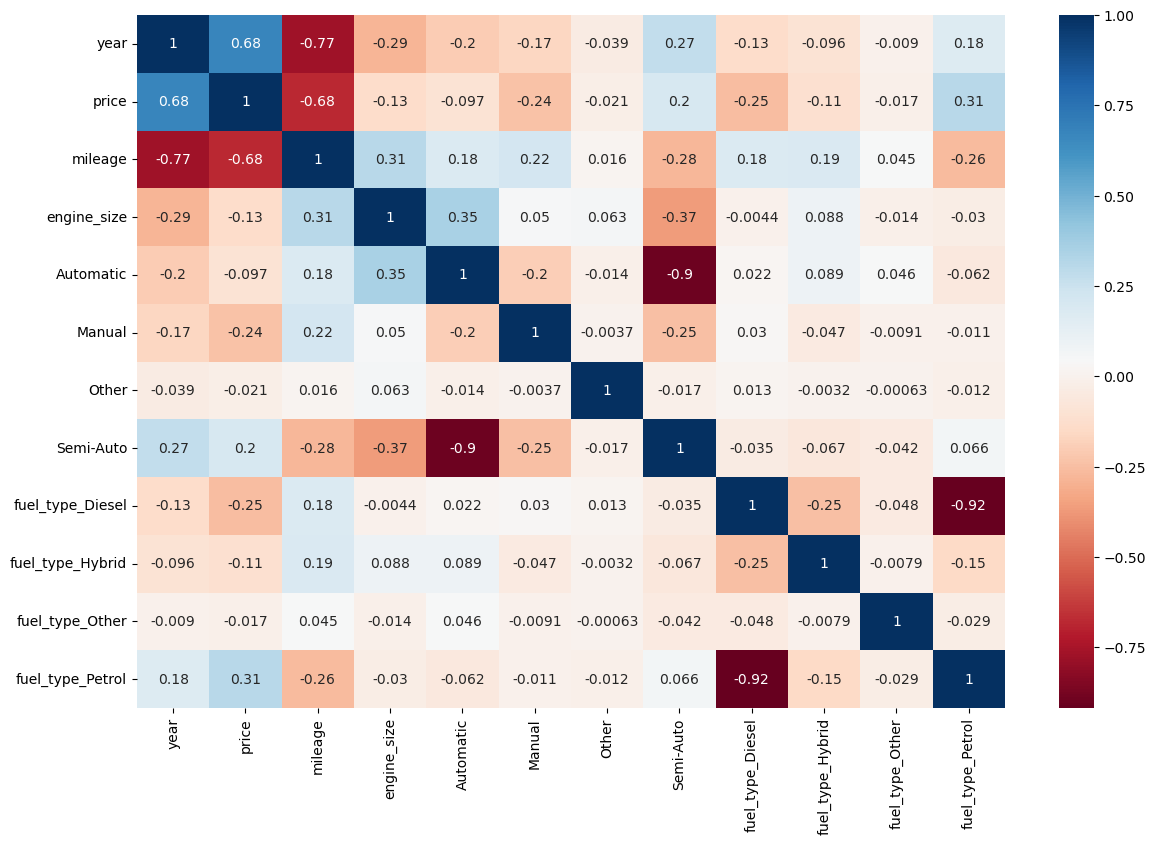

In [57]:
# Visualize them to make it clear to see
plt.figure(figsize=(14,9))
sns.heatmap(dcomp.corr(), annot = True, cmap="RdBu")
plt.show()

In [58]:
# Spliting them into reposonse and features
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
resp_comp = dcomp['price']

# option 1: include all data except the price
# index already dropped in previous step
#feat_comp = dcomp.drop('price', axis = 1)

# option 2: only include particular columns
#feat_comp = dcomp[['year','mileage','engine_size']]
feat_comp = dcomp[['year','mileage','engine_size', 'fuel_type_Petrol', 'Manual', 'fuel_type_Diesel', 'Semi-Auto']]

#check
feat_comp.head()

,year,mileage,engine_size,fuel_type_Petrol,Manual,fuel_type_Diesel,Semi-Auto
0,2020,1200.0,2.0,0,0,1,0
1,2020,1000.0,1.5,1,0,0,0
2,2020,500.0,2.0,0,0,1,0
3,2019,5000.0,2.0,0,0,1,0
4,2019,4500.0,2.0,0,0,1,0


In [59]:
# scale the features
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

# calucate mean & STD and transform all value to standard value
zscore_comp = ss.fit_transform(feat_comp)
feat_comp_ss = pd.DataFrame(zscore_comp, index = feat_comp.index, columns = feat_comp.columns)
feat_comp_ss = feat_comp_ss.reset_index(drop = True)
feat_comp_ss.head()

,year,mileage,engine_size,fuel_type_Petrol,Manual,fuel_type_Diesel,Semi-Auto
0,1.205931,-0.937674,-0.347743,-0.749198,-0.231976,0.816147,-1.064427
1,1.205931,-0.946529,-0.348454,1.334760,-0.231976,-1.225269,-1.064427
2,1.205931,-0.968666,-0.347743,-0.749198,-0.231976,0.816147,-1.064427
3,0.752354,-0.769432,-0.347743,-0.749198,-0.231976,0.816147,-1.064427
4,0.752354,-0.791569,-0.347743,-0.749198,-0.231976,0.816147,-1.064427


## Traing and Testing
### 1. Model: Linear Regression

In [60]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

# Split the data into training and testing subsets
X_train_linear, X_test_linear, Y_train_linear, Y_test_linear = train_test_split(feat_comp_ss, resp_comp, test_size=0.1, random_state = 1024)

# Making sure split is completed
print("Training and testing split was completed.")

Training and testing split was completed.


In [61]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_linear,Y_train_linear)

LinearRegression()

In [62]:
# get the predictions for the test dataset
predictions_linear = model.predict(X_test_linear)

In [63]:
# calculate the performance metric
from sklearn.metrics import mean_squared_error

r2_comp_train_linear = model.score(X_train_linear,Y_train_linear)
print ("R2 train:", r2_comp_train_linear)

r2_comp_test_linear = model.score(X_test_linear,Y_test_linear)
print ("R2 test:", r2_comp_test_linear)

rmse_comp_linear = mean_squared_error(Y_test_linear, predictions_linear)**0.5
print ("RMSE Test:", rmse_comp_linear)

R2 train: 0.5573823958591844
R2 test: 0.5825874860022419
RMSE Test: 6091.7385550783


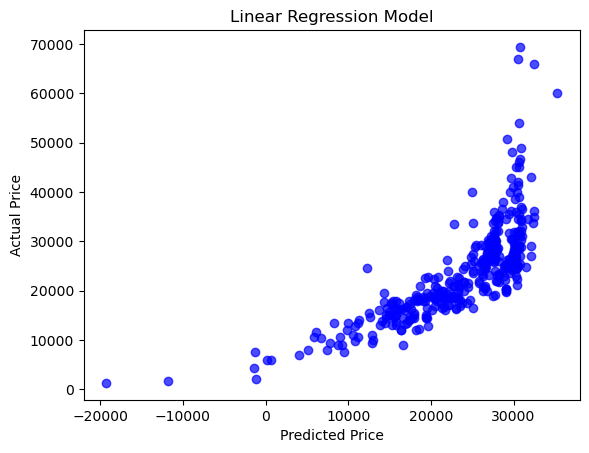

In [64]:
actual_values = Y_test_linear
plt.scatter(predictions_linear, actual_values, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

In [65]:
# To print out the coefficient list
feat_list = list(X_train_linear.columns)
coef = model.coef_.transpose()
coef_table = np.vstack((feat_list, coef)).T
df_coeff_list = pd.DataFrame(coef_table, columns=['Feature', 'Coefficients'])
df_coeff_list

,Feature,Coefficients
0,year,3557.3321468926933
1,mileage,-3025.1678448495313
2,engine_size,842.3983390509368
3,fuel_type_Petrol,1276.7428211271904
4,Manual,-967.8256828591624
5,fuel_type_Diesel,-25.079170102300623
6,Semi-Auto,22.80587552809118


### 2. Model: Linear Regression (with Ridge)

In [66]:
# import the libraries
from sklearn.linear_model import Ridge, Lasso

In [67]:
# Creating alphas
alphas = 10**np.linspace(7,0,20)
alphas

array([1.00000000e+07, 4.28133240e+06, 1.83298071e+06, 7.84759970e+05,
       3.35981829e+05, 1.43844989e+05, 6.15848211e+04, 2.63665090e+04,
       1.12883789e+04, 4.83293024e+03, 2.06913808e+03, 8.85866790e+02,
       3.79269019e+02, 1.62377674e+02, 6.95192796e+01, 2.97635144e+01,
       1.27427499e+01, 5.45559478e+00, 2.33572147e+00, 1.00000000e+00])

In [68]:
xtrain_ridge, xtest_ridge, ytrain_ridge, ytest_ridge = train_test_split(feat_comp_ss, resp_comp, test_size = 0.1, random_state=1024)

ridge_comp = Ridge()
coefs_comp = []
for a in alphas:
    ridge_comp.set_params(alpha = a)
    ridge_comp.fit(feat_comp_ss, resp_comp)
    coefs_comp.append(ridge_comp.coef_)
    
np.shape(coefs_comp)

(20, 7)

Text(0, 0.5, 'weights')

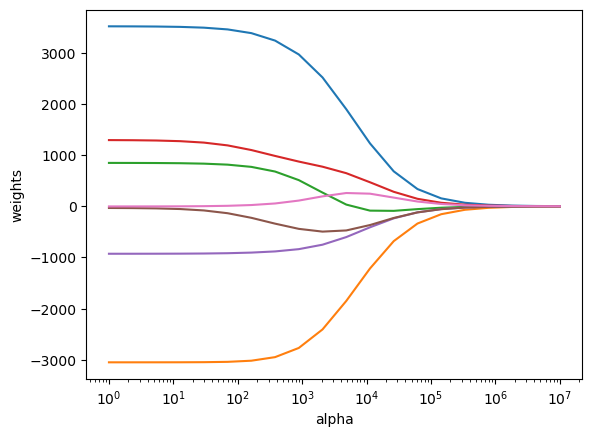

In [69]:
plt.plot(alphas, coefs_comp)
ax = plt.gca()
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [70]:
# let's ridge them!

rmse_test_list = []
r2_test_list = []
r2_train_list = []

best_r2_test_ridge = 0
best_alpha_ridge  = 0
counter = 0
best_counter = 0

for a in alphas:
    ridge = Ridge(alpha = a, max_iter = 1000)
    ridge.fit(xtrain_ridge, ytrain_ridge)
    # Make prediction in the test set
    pred_comp = ridge.predict(xtest_ridge)
    
    #ridge.score(x,y) is the code to find out the r-square
    r2_train_ridge = ridge.score(xtrain_ridge,ytrain_ridge)
    r2_train_list.append(r2_train_ridge)

    #To find out the R-square for the test set
    r2_test_ridge = ridge.score(xtest_ridge,ytest_ridge)
    r2_test_list.append(r2_test_ridge)
    
    #To find out the R-square for the test set
    rmse_test_ridge = mean_squared_error(ytest_ridge,pred_comp)**0.5
    rmse_test_list.append(rmse_test_ridge)
    
    if r2_test_ridge > best_r2_test_ridge:
        best_r2_test_ridge = r2_test_ridge
        best_alpha_ridge = a
        best_counter = counter
        
    counter = counter + 1
            
# Above pattern is the same,first create it, then fit it in the model
# To generate a table of the above results, by using "np.vstack()", and remmber to use the transpose to make row become col, cole become row, rotate 90 degree
ridge_result = np.vstack((alphas, r2_train_list, r2_test_list, rmse_test_list)).T
ridge_df = pd.DataFrame(ridge_result, columns = ['Alphas', 'R2 Train', 'R2 Test', 'RMSE Test'])
print(ridge_df)
print("Best Alpha is at : ",best_alpha_ridge)
print()
print("Position:", best_counter)

          Alphas  R2 Train   R2 Test    RMSE Test
0   1.000000e+07  0.000817  0.000264  9427.599760
1   4.281332e+06  0.001906  0.001424  9422.130550
2   1.832981e+06  0.004435  0.004118  9409.411833
3   7.847600e+05  0.010270  0.010333  9380.005826
4   3.359818e+05  0.023513  0.024437  9312.925471
5   1.438450e+05  0.052478  0.055284  9164.510053
6   6.158482e+04  0.110935  0.117514  8857.525013
7   2.636651e+04  0.211289  0.224225  8304.748197
8   1.128838e+04  0.341400  0.362073  7530.850199
9   4.832930e+03  0.455620  0.481818  6787.338842
10  2.069138e+03  0.521417  0.549148  6331.046894
11  8.858668e+02  0.547379  0.574516  6150.355116
12  3.792690e+02  0.554989  0.581285  6101.232931
13  1.623777e+02  0.556851  0.582595  6091.681309
14  6.951928e+01  0.557271  0.582724  6090.739306
15  2.976351e+01  0.557360  0.582676  6091.095603
16  1.274275e+01  0.557378  0.582631  6091.419145
17  5.455595e+00  0.557382  0.582607  6091.593234
18  2.335721e+00  0.557382  0.582596  6091.674724


R2 train: 0.5572705947742862
R2 test: 0.5827244140813932
RMSE test: 6090.739305595675

Coefficients:
year                3484.464718
mileage            -3017.083109
engine_size          803.930902
fuel_type_Petrol    1160.077766
Manual              -955.116187
fuel_type_Diesel    -140.754099
Semi-Auto             36.544505
dtype: float64


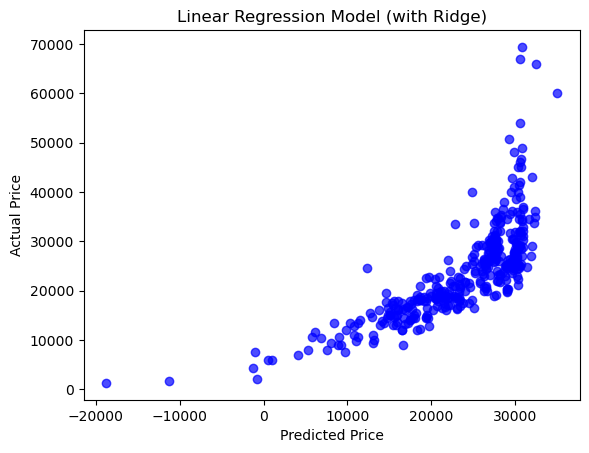

In [71]:
# find out the coefficient for the best result
ridge = Ridge(alpha=best_alpha_ridge)
ridge.fit(xtrain_ridge, ytrain_ridge)
pred_ridge = ridge.predict(xtest_ridge)

r2_comp_train_ridge = ridge.score(xtrain_ridge, ytrain_ridge)
r2_comp_test_ridge = ridge.score(xtest_ridge, ytest_ridge)
rmse_comp_test_ridge = mean_squared_error(pred_ridge,ytest_ridge) ** 0.5

print("R2 train:", r2_comp_train_ridge)
print("R2 test:", r2_comp_test_ridge)
print("RMSE test:", rmse_comp_test_ridge)
print()   
print("Coefficients:")
print(pd.Series(ridge.coef_,index = feat_comp_ss.columns))

# plot
actual_values = ytest_ridge
plt.scatter(pred_ridge, actual_values, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model (with Ridge)')
plt.show()

### 3. Model: Linear Regression (with Lasso)

In [72]:
alphas = np.linspace(50,0.5,30)


In [73]:
xtrain_lasso, xtest_lasso, ytrain_lasso, ytest_lasso = train_test_split(feat_comp_ss,resp_comp, test_size = 0.1, random_state=1024)

In [74]:
# let's put them in the lasso! yee haw
# let's Lasso them!

rmse_test_list = []
r2_test_list = []
r2_train_list = []

best_r2_test_lasso = 0
best_alpha_lasso  = 0
counter = 0
best_counter = 0


for a in alphas:
    lasso = Lasso(alpha = a, max_iter = 2000)
    lasso.fit(xtrain_lasso, ytrain_lasso)
    # Make prediction in the test set
    pred_lasso = lasso.predict(xtest_lasso)
    
    #ridge.score(x,y) is the code to find out the r-square
    r2_train_lasso = lasso.score(xtrain_lasso,ytrain_lasso)
    r2_train_list.append(r2_train_lasso)

    #To find out the R-square for the test set
    r2_test_lasso = lasso.score(xtest_lasso, ytest_lasso)
    r2_test_list.append(r2_test_lasso)
    
    #To find out the R-square for the test set
    rmse_test_lasso = mean_squared_error(ytest_lasso,pred_lasso)**0.5
    rmse_test_list.append(rmse_test_lasso)
    
    if r2_test_lasso > best_r2_test_lasso:
        best_r2_test_lasso = r2_test_lasso
        best_alpha_lasso = a
        best_counter = counter
        
    counter = counter + 1
            
# Above pattern is the same,first create it, then fit it in the model
# To generate a table of the above results, by using "np.vstack()", and remmber to use the transpose to make row become col, cole become row, rotate 90 degree
lasso_result = np.vstack((alphas, r2_train_list, r2_test_list, rmse_test_list)).T
lasso_df = pd.DataFrame(lasso_result, columns = ['Alphas', 'R2 Train', 'R2 Test', 'RMSE Test'])

print(lasso_df)
print()
print("Best alpha valus is:", best_alpha_lasso)
print()
print("Position:", best_counter)

       Alphas  R2 Train   R2 Test    RMSE Test
0   50.000000  0.557239  0.582773  6090.386501
1   48.293103  0.557248  0.582774  6090.377656
2   46.586207  0.557257  0.582775  6090.370995
3   44.879310  0.557266  0.582775  6090.366547
4   43.172414  0.557274  0.582776  6090.364211
5   41.465517  0.557282  0.582776  6090.364043
6   39.758621  0.557290  0.582776  6090.366022
7   38.051724  0.557297  0.582775  6090.370112
8   36.344828  0.557304  0.582774  6090.374460
9   34.637931  0.557311  0.582773  6090.382830
10  32.931034  0.557317  0.582772  6090.392558
11  31.224138  0.557323  0.582770  6090.405212
12  29.517241  0.557329  0.582768  6090.419971
13  27.810345  0.557334  0.582766  6090.436657
14  26.103448  0.557340  0.582763  6090.455648
15  24.396552  0.557344  0.582760  6090.476744
16  22.689655  0.557349  0.582757  6090.500097
17  20.982759  0.557353  0.582754  6090.525440
18  19.275862  0.557357  0.582750  6090.552888
19  17.568966  0.557361  0.582737  6090.643809
20  15.862069

R2 train: 0.5572823059834504
R2 test: 0.5827758308868005
RMSE test: 6090.364042800613

Coefficients:
year                3527.394313
mileage            -3005.026127
engine_size          777.357610
fuel_type_Petrol    1265.129710
Manual              -939.117138
fuel_type_Diesel      -3.488983
Semi-Auto              0.000000
dtype: float64


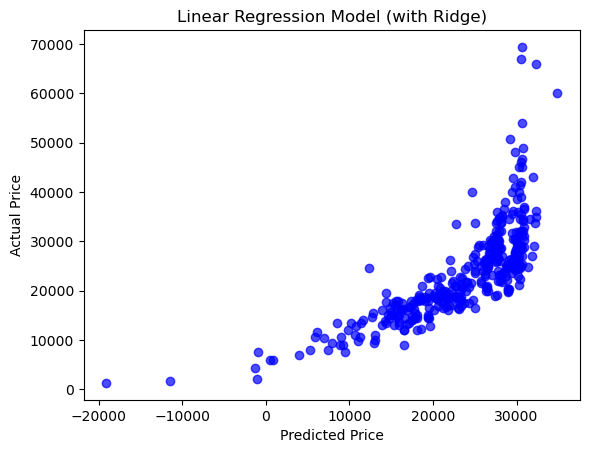

In [75]:
# find out the coefficient for the best result

lasso = Lasso(alpha = best_alpha_lasso)
lasso.fit(xtrain_lasso, ytrain_lasso)             # Fit a lasso regression on the training data
pred_lasso = lasso.predict(xtest_lasso)           # Use this model to predict the test data

r2_comp_train_lasso = lasso.score(xtrain_lasso,ytrain_lasso)
r2_comp_test_ridge_lasso = lasso.score(xtest_lasso, ytest_lasso)
rmse_comp_test_ridge_lasso = mean_squared_error(ytest_lasso,pred_lasso)**0.5

print("R2 train:", r2_comp_train_lasso)
print("R2 test:", r2_comp_test_ridge_lasso)
print("RMSE test:", rmse_comp_test_ridge_lasso)
print()      
print("Coefficients:")
print(pd.Series(lasso.coef_, index = feat_comp_ss.columns)) # Print coefficients   

# plot
actual_values = ytest_lasso
plt.scatter(pred_lasso, actual_values, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model (with Ridge)')
plt.show()

### 4. Model: Polynomial Regression (with Ridge)

In [76]:
#importing polynomial regression library
from sklearn.preprocessing import PolynomialFeatures
#from sklearn.pipeline import make_pipeline
#polyreg = make_pipeline(PolynomialFeatures(2), LinearRegression())

# Split the data into training and testing subsets
Xcomp_train_poly, Xcomp_test_poly, Ycomp_train_poly, Ycomp_test_poly = train_test_split(feat_comp_ss, resp_comp, test_size=0.1, random_state = 1024)

# Making sure split is completed
print("Training and testing split was completed.")

Training and testing split was completed.


In [77]:
# declare variables to store the results
r2_comp_train_poly_result_list = []
r2_comp_test_poly_result_list = []
rmse_comp_poly_result_list = []
degree_comp_poly_list = []

In [78]:
# define a function to apply polynomial regression model with Ridge Regularization
def applyPolynomialRegression_comp(input_degree):
    
    r2_comp_train_poly_ridge_list = []
    r2_comp_test_poly_ridge_list = []
    rmse_comp_poly_ridge_list = []
    
    best_r2_comp_test_poly_ridge = 0
    best_alpha_comp_poly_ridge = 0
    counter_comp_poly_ridge = 0
    best_counter_comp_poly_ridge = 0
    
    degree_comp_poly_list.append(input_degree)
    
    # Generate an array of alpha values
    alphas_comp_ridge = 10 ** np.linspace(20, -30, 20)   
    
    # create polynomial features
    poly_comp = PolynomialFeatures(degree = input_degree)
    Xcomp_train_poly_fitted = poly_comp.fit_transform(Xcomp_train_poly)


    # fit a polynomial regression model with Ridge regularization
    for alpha in alphas_comp_ridge:
        ridge_model_comp = Ridge(alpha = alpha, max_iter = 1000)
        ridge_model_comp.fit(Xcomp_train_poly_fitted, Ycomp_train_poly)   

        # make predictions
        Xcomp_test_poly_transformed = poly_comp.transform(Xcomp_test_poly)
        y_pred_comp = ridge_model_comp.predict(Xcomp_test_poly_transformed)


        # show the result
        # calculate the metrics
        r2_comp_train_poly = ridge_model_comp.score(Xcomp_train_poly_fitted, Ycomp_train_poly)
        r2_comp_train_poly_ridge_list.append(r2_comp_train_poly)

        r2_comp_test_poly = ridge_model_comp.score(Xcomp_test_poly_transformed, Ycomp_test_poly)
        r2_comp_test_poly_ridge_list.append(r2_comp_test_poly)

        rmse_comp_poly = np.sqrt(mean_squared_error(Ycomp_test_poly, y_pred_comp))
        rmse_comp_poly_ridge_list.append(rmse_comp_poly)

        
        if r2_comp_test_poly > best_r2_comp_test_poly_ridge:
            best_r2_comp_test_poly_ridge = r2_comp_test_poly
            best_alpha_comp_poly_ridge = alpha
            best_counter_comp_poly_ridge = counter_comp_poly_ridge 
        
        counter_comp_poly_ridge = counter_comp_poly_ridge + 1
        
    # show the result
    comp_poly_ridge_result = np.vstack((alphas_comp_ridge, r2_comp_train_poly_ridge_list, r2_comp_test_poly_ridge_list, rmse_comp_poly_ridge_list)).T
    comp_poly_ridge_df = pd.DataFrame(comp_poly_ridge_result, columns = ['Alpha', 'R2 Train', 'R2 Test', 'RMSE Test'])
    print("Polynomial Regression (Degree = " + str(input_degree) + ") with Ridge Regularization:")
    print()
    print(comp_poly_ridge_df)
    print()
    print("best_alpha: ", best_alpha_comp_poly_ridge)    
    print("Position:", best_counter_comp_poly_ridge)
    print()
    
#--------------------------------------------------------------------------
# use the best alpha value to apply polynoimal regress with ridge
    # apply the model
    ridge_model_comp = Ridge(alpha = best_alpha_comp_poly_ridge)
    ridge_model_comp.fit(Xcomp_train_poly_fitted, Ycomp_train_poly)
    y_pred_comp = ridge_model_comp.predict(Xcomp_test_poly_transformed)
    
    # calculate the result metric
    r2_comp_train_poly = ridge_model_comp.score(Xcomp_train_poly_fitted, Ycomp_train_poly)
    r2_comp_train_poly_result_list.append(r2_comp_train_poly)
    print("R^2 in Training Set: ", r2_comp_train_poly)

    r2_comp_test_poly = ridge_model_comp.score(Xcomp_test_poly_transformed, Ycomp_test_poly)
    r2_comp_test_poly_result_list.append(r2_comp_test_poly)
    print("R^2 in Testing Set: ", r2_comp_test_poly)

    rmse_comp_poly = np.sqrt(mean_squared_error(Ycomp_test_poly, y_pred_comp))
    rmse_comp_poly_result_list.append(rmse_comp_poly)
    print("RMSE in Testing Set is: ", rmse_comp_poly)

    
    # Get the coefficients from the polynomial regression model
    #print("Number of features used in the model: ", len(lin_reg_model_comp.coef_))
    # Plot the prediction vs actual values
    %matplotlib inline
    actual_value_comp = Ycomp_test_poly
    plt.scatter(y_pred_comp, actual_value_comp, alpha=0.7, color='b')
    plt.xlabel("Predicted Price")
    plt.ylabel("Actual Price")
    plt.title("Polynomial Regression Model (Degree = " + str(input_degree) + ") with Ridge Regularization")
    plt.show()

    
    print("------------------------------------------------------------------------------------")

Polynomial Regression (Degree = 2) with Ridge Regularization:

           Alpha      R2 Train   R2 Test    RMSE Test
0   1.000000e+20  4.440892e-16 -0.000606  9431.703763
1   2.335721e+17  1.353362e-13 -0.000606  9431.703763
2   5.455595e+14  5.790490e-11 -0.000606  9431.703763
3   1.274275e+12  2.479099e-08 -0.000606  9431.703626
4   2.976351e+09  1.061338e-05 -0.000594  9431.645008
5   6.951928e+06  4.460730e-03  0.004630  9406.990907
6   1.623777e+04  3.232407e-01  0.346767  7620.659076
7   3.792690e+01  6.231519e-01  0.668032  5432.582690
8   8.858668e-02  6.281197e-01  0.672689  5394.350275
9   2.069138e-04  7.571581e-01  0.795163  4267.397371
10  4.832930e-07  7.590158e-01  0.800159  4215.026758
11  1.128838e-09  7.590158e-01  0.800169  4214.925664
12  2.636651e-12  7.590158e-01  0.800169  4214.925436
13  6.158482e-15  7.590158e-01  0.800169  4214.925435
14  1.438450e-17  7.590158e-01  0.800169  4214.925435
15  3.359818e-20  7.590158e-01  0.800169  4214.925442
16  7.847600e-23  7

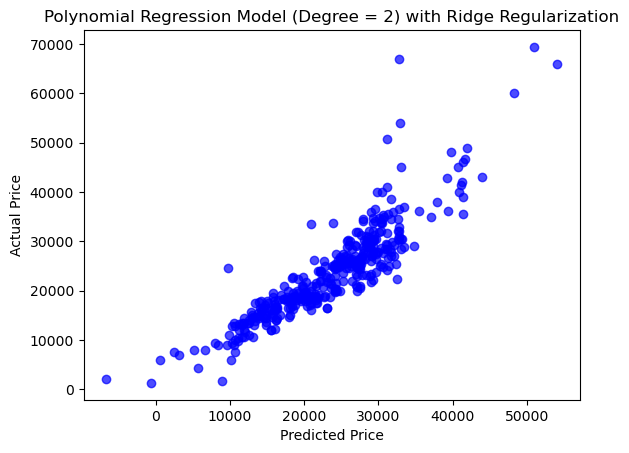

------------------------------------------------------------------------------------
Polynomial Regression (Degree = 3) with Ridge Regularization:

           Alpha      R2 Train   R2 Test    RMSE Test
0   1.000000e+20  7.993606e-15 -0.000606  9431.703763
1   2.335721e+17  3.375522e-12 -0.000606  9431.703763
2   5.455595e+14  1.445196e-09 -0.000606  9431.703754
3   1.274275e+12  6.187320e-07 -0.000606  9431.699990
4   2.976351e+09  2.641069e-04 -0.000265  9430.092928
5   6.951928e+06  5.612216e-02  0.071114  9087.403483
6   1.623777e+04  5.127574e-01  0.542963  6374.326477
7   3.792690e+01  6.513794e-01  0.695512  5202.877593
8   8.858668e-02  6.780345e-01  0.718890  4999.157931
9   2.069138e-04  8.035491e-01  0.828448  3905.318273
10  4.832930e-07  8.041685e-01  0.827427  3916.922190
11  1.128838e-09  8.050069e-01  0.830391  3883.144346
12  2.636651e-12  8.052449e-01  0.832332  3860.853207
13  6.158482e-15  8.052449e-01  0.832339  3860.771475
14  1.438450e-17  8.052449e-01  0.832339  

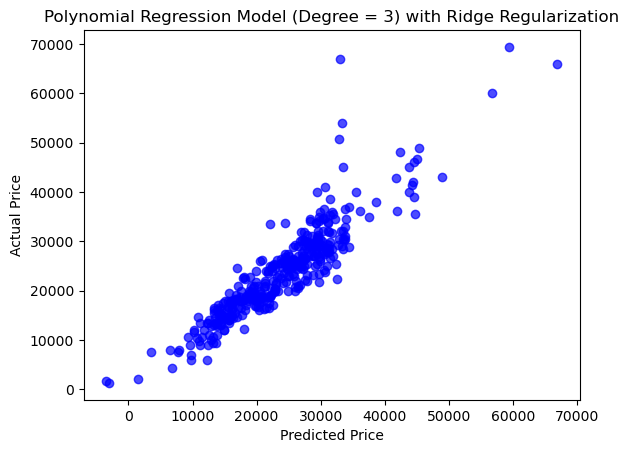

------------------------------------------------------------------------------------
Polynomial Regression (Degree = 4) with Ridge Regularization:

           Alpha      R2 Train   R2 Test    RMSE Test
0   1.000000e+20  2.364775e-13 -0.000606  9431.703763
1   2.335721e+17  1.012659e-10 -0.000606  9431.703762
2   5.455595e+14  4.335519e-08 -0.000606  9431.703475
3   1.274275e+12  1.854505e-05 -0.000580  9431.580778
4   2.976351e+09  5.815807e-03  0.007878  9391.633072
5   6.951928e+06  1.321011e-01  0.152352  8680.928540
6   1.623777e+04  5.547862e-01  0.506824  6621.549705
7   3.792690e+01  6.686147e-01  0.368065  7495.396445
8   8.858668e-02  7.337160e-01  0.455689  6956.359239
9   2.069138e-04  8.143798e-01  0.738299  4823.490162
10  4.832930e-07  8.147968e-01  0.741723  4791.829382
11  1.128838e-09  8.181394e-01  0.751194  4703.148450
12  2.636651e-12  8.196067e-01  0.770638  4515.635488
13  6.158482e-15  8.199486e-01  0.740092  4806.933041
14  1.438450e-17  8.200302e-01  0.727178  

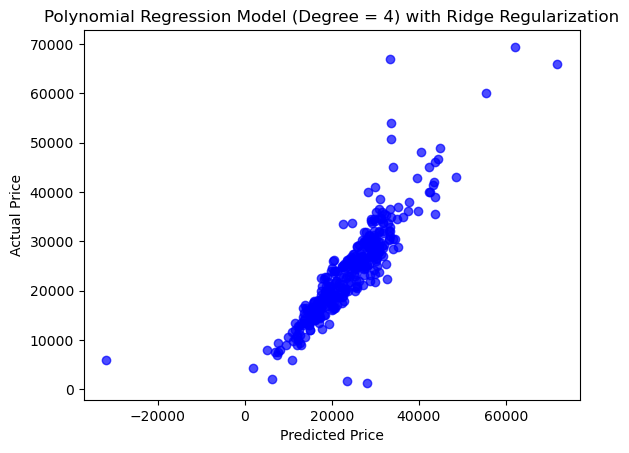

------------------------------------------------------------------------------------
Polynomial Regression (Degree = 5) with Ridge Regularization:

           Alpha      R2 Train   R2 Test     RMSE Test
0   1.000000e+20  1.363687e-11 -0.000606   9431.703763
1   2.335721e+17  5.838424e-09 -0.000606   9431.703726
2   5.455595e+14  2.498837e-06 -0.000603   9431.687918
3   1.274275e+12  9.426036e-04  0.000699   9425.551557
4   2.976351e+09  3.405880e-02  0.038859   9243.830558
5   6.951928e+06  2.048208e-01  0.167832   8601.297474
6   1.623777e+04  6.126851e-01  0.139098   8748.533844
7   3.792690e+01  6.838993e-01 -1.955632  16210.025336
8   8.858668e-02  7.834722e-01 -1.353755  14465.689126
9   2.069138e-04  8.215419e-01 -1.075968  13585.288642
10  4.832930e-07  8.222611e-01 -1.287476  14260.567679
11  1.128838e-09  8.263428e-01 -1.279335  14235.169492
12  2.636651e-12  8.282647e-01 -1.011707  13373.369304
13  6.158482e-15  8.289024e-01 -0.957451  13191.798965
14  1.438450e-17  8.289881e

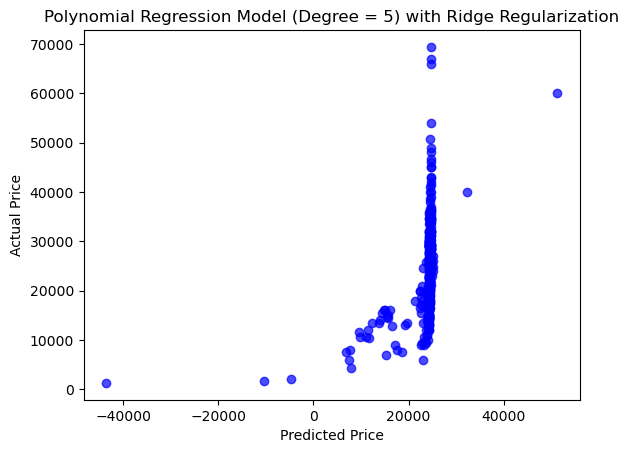

------------------------------------------------------------------------------------


In [79]:
#clear the result list first
r2_comp_train_poly_result_list.clear()
r2_comp_test_poly_result_list.clear()
rmse_comp_poly_result_list.clear()
degree_comp_poly_list.clear()

# call the function above to apply polynomial regression
for i in range(2, 6):
    applyPolynomialRegression_comp(i)

In [80]:
# list the results for comparison
comp_poly_result_list = np.vstack((degree_comp_poly_list, r2_comp_train_poly_result_list, r2_comp_test_poly_result_list, rmse_comp_poly_result_list)).T

comp_poly_result_df = pd.DataFrame(comp_poly_result_list, columns = ['Degree', 'R2 Train', 'R2 Test', 'RMSE Test'])
print(comp_poly_result_df)
print()

   Degree  R2 Train   R2 Test    RMSE Test
0     2.0  0.758735  0.800254  4214.029473
1     3.0  0.804558  0.833663  3845.496808
2     4.0  0.819607  0.770638  4515.635488
3     5.0  0.204821  0.167832  8601.297474



## Results Comparison

### Linear Regression:

In [81]:
print ("R2 train:", r2_comp_train_linear)
print ("R2 test:", r2_comp_test_linear)
print ("RMSE test:", rmse_comp_linear)

R2 train: 0.5573823958591844
R2 test: 0.5825874860022419
RMSE test: 6091.7385550783


### Linear Regression (with Ridge)

In [82]:
print("R2 train:", r2_comp_train_ridge)
print("R2 test:", r2_comp_test_ridge)
print("RMSE test:", rmse_comp_test_ridge)

R2 train: 0.5572705947742862
R2 test: 0.5827244140813932
RMSE test: 6090.739305595675


### Linear Regression (with Lasso)

In [83]:
print("R2 train:", r2_comp_train_lasso)
print("R2 test:", r2_comp_test_ridge_lasso)
print("RMSE test:", rmse_comp_test_ridge_lasso)

R2 train: 0.5572823059834504
R2 test: 0.5827758308868005
RMSE test: 6090.364042800613


### Polynomial Regression (with Ridge)

In [84]:
print(comp_poly_result_df)

   Degree  R2 Train   R2 Test    RMSE Test
0     2.0  0.758735  0.800254  4214.029473
1     3.0  0.804558  0.833663  3845.496808
2     4.0  0.819607  0.770638  4515.635488
3     5.0  0.204821  0.167832  8601.297474


# Part B: Conclusion

In this part, we chose all the features that have correlation higher than or equal to +/- 0.2: 'year','mileage', 'Manual', 'Semi-Auto', 'fuel_type_Diesel' and 'fuel_type_Petrol'. In addition, since 'engine_size' has a certain correlation with mileage wihch in turn has high correlation with Price, it was also chosen as the feature.

We evaluated 4 different regression models: Linear, Linear with Ridge, Linear with Lasso, and Polynomial Regression with Ridge. All three linear regression models exhibited similar training R-squared values, hovering around 0.557, and achieved test R-squared values of approximately 0.583, with relatively large RMSE values of 6091.

However, there is a significant improvement when we introduced the polynomial regression model with a degree of 3. The training R-squared value increased to 0.805, and the matching test R-squared value increased to 0.834, with a far lower RMSE of 3845. This performance outperformed the linear regression models. The polynomial regression model at degree 3 appears to strike a better balance between model complexity, generalization and performance on both training and testing data.

As the result, we chose the polynomial regression with Ridge regularization model (degree 3) as our final model.

# Part C Member Contributions:

| Evaluator & Evaluatee| Derek Lam | Ryan Chan | Sunny Lam |
| :---: | :---: | :---: |:---: |
| Derek Lam | - | 4 | 4 |
| Ryan Chan | 4 | - | 4 |
| Sunny Lam | 4 | 4 | - |